# **FIFA 22 Player Analysis**

## **1. Business Objective**

FIFA 22 is a football simulation video game developed by EA Vancouver as part of Electronic Arts’ FIFA series. As a football fan and game player, the aim of the project is to perform Exploratory Data Analysis on the dataset.

The dataset contains lot's of information, regarding players physical attributes as well as their wages, playing positions and national backgrounds. This provides us with wide variety of opportunities to analyze the correlations of different attributes, compute statistical quantities, representing the averages of characteristics needed, to become a professional player and so on. We also can apply supervised and unsupervised learning techniques to obtain new knowledge about the specifics of some groups of players as well as derive general conclusions of the dataset as a whole.




## **2. Data Collection**

The dataset has been obtained from kaggle.

Link : [Click here to downmload it](https://www.kaggle.com/bryanb/fifa-player-stats-database)


In [1]:
# Connecting to Google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Setting up some parameters for the workbook

plt.style.use('classic')
pd.set_option('display.max_rows', 500)
pd.options.display.max_columns = None

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (10,5)

In [4]:
!pip install fuzzywuzzy

In [5]:
# Importing sklearn libraries needed

import re

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.cluster import MiniBatchKMeans, DBSCAN, OPTICS, AgglomerativeClustering, AffinityPropagation, SpectralClustering , MeanShift, estimate_bandwidth
from sklearn import metrics
from scipy.spatial.distance import cdist

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

## **3. Data Preparation/Preprocessing**

We will start with loading and familiarizing with the dataset so that we can prepare the data for Machine Learning (ML) modeling.

In [6]:
# Loading the dataset

file_path = "/content/drive/MyDrive/Dataset/FIFA22 OFFICIAL DATASET/FIFA22_official_data.csv"
fifa_data = pd.read_csv(file_path)

In [7]:
# Checking the features and no. of records in the dataset.

print("The number of records are : ", fifa_data.shape[0])
print("The number of features are : ", fifa_data.shape[1])
print("The list of features is : ", fifa_data.columns)
fifa_data.head()

The number of records are :  16710
The number of features are :  65
The list of features is :  Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position',

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,€107.5M,€250K,2341,Right,3.0,3.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos18"">CAM",18.0,"Jan 30, 2020",NaN,2025,179cm,69kg,87.0,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,77.0,73.0,80.0,91.0,79.0,89.0,73.0,91.0,70.0,89.0,78.0,66.0,87.0,90.0,91.0,87.0,NaN,73.0,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,€93M,€140K,2314,Right,4.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos11"">LDM",8.0,"Jul 1, 2018",NaN,2026,189cm,82kg,75.0,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,78.0,83.0,76.0,88.0,71.0,85.0,79.0,88.0,88.0,86.0,81.0,86.0,85.0,84.0,60.0,82.0,NaN,85.0,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,€44.5M,€135K,2307,Right,5.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos24"">RS",9.0,"Sep 25, 2020",NaN,2022,182cm,83kg,80.0,93.0,84.0,83.0,90.0,83.0,86.0,82.0,77.0,86.0,76.0,69.0,75.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,87.0,NaN,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,€125.5M,€350K,2304,Right,4.0,5.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos13"">RCM",17.0,"Aug 30, 2015",NaN,2025,181cm,70kg,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,76.0,76.0,79.0,91.0,78.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,83.0,89.0,NaN,65.0,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,€37M,€45K,2292,Left,2.0,3.0,4.0,High/ High,Stocky (170-185),No,"<span class=""pos pos7"">LB",19.0,"Sep 14, 2020",NaN,2024,172cm,69kg,87.0,66.0,58.0,82.0,68.0,87.0,88.0,75.0,78.0,88.0,77.0,76.0,83.0,83.0,90.0,82.0,63.0,90.0,80.0,81.0,84.0,79.0,81.0,82.0,76.0,87.0,NaN,84.0,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0


Observations:

There are 16K+ players in the dataset with 60+ features. Some the features need bit of cleaning.

### **3.1 Data Cleaning**

We will begin with data cleaning such that we can handle missing values, outliers, rare values and dropping the unnecessary features that do not carry useful information.


#### **3.1.1 Dropping Irrelevant Features and Records**

Removing irrelevant features and records from the dataset.

In [8]:
# There are many retired players in the dataset that needs to be removed.

filter = fifa_data["Release Clause"].isnull() & fifa_data["Contract Valid Until"].isnull()

In [9]:
fifa_data = fifa_data[~filter]

In [10]:
def CleanContractUntill(x):
    if not pd.isna(x):
        return int(x[-4:])

fifa_data["Contract Valid Until"] = fifa_data["Contract Valid Until"].apply(CleanContractUntill)

In [11]:
filter2 = (fifa_data["Release Clause"].isnull()) & (fifa_data["Contract Valid Until"] <= 2019)

In [12]:
fifa_data = fifa_data[~filter2]

In [13]:
filter3 = (fifa_data["Contract Valid Until"] < 2019) & (fifa_data["Overall"] <= 81)

In [14]:
fifa_data = fifa_data[~filter3]

In [15]:
filter4 = (fifa_data["DefensiveAwareness"].isnull()) & (fifa_data["Contract Valid Until"].isnull()) & (fifa_data["Contract Valid Until"] <= 2020)

In [16]:
fifa_data = fifa_data[~filter4]

In [17]:
filter5 = (fifa_data["DefensiveAwareness"].isnull()) & (fifa_data["Age"] >= 30)

In [18]:
fifa_data = fifa_data[~filter5]

##### Using various filters on the raw data, I removed certain records of old retired players that could have disrupted our analysis.

In [19]:
features_to_drop = ["ID", "Photo", "Flag", "Club Logo", "Special", "Body Type", "Real Face", "Jersey Number", "Joined", "Position", "Loaned From", "Contract Valid Until", "Release Clause"]

In [20]:
# Dropping irrelevant features

fifa_data = fifa_data.drop(labels=features_to_drop, axis=1)

In [21]:
# Dropping duplicate records

fifa_data = fifa_data.drop_duplicates()

In [22]:
# Rearranging features

fifa_data = fifa_data[['Name', 'Nationality', 'Club', 'Age', 'Height', 'Weight', 'Value', 'Wage', 'Best Position',
                       'Preferred Foot', 'International Reputation', 'Weak Foot',
                      'Skill Moves', 'Work Rate', 'Overall', 'Potential', 'Best Overall Rating', 'Crossing', 'Finishing',
                       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                      'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
                       'Agility', 'Reactions', 'Balance', 'ShotPower',
                      'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
                       'Positioning', 'Vision', 'Penalties', 'Composure',
                      'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking',
                       'GKPositioning', 'GKReflexes', 'DefensiveAwareness']]

In [23]:
# Sorting Dataframe based on "Overall" feature

fifa_data = fifa_data.sort_values(by=["Overall"], ascending=False, ignore_index=True)

#### **3.1.2 Feature Cleaning**

Cleaning features and extracting numeric values from string values.

In [24]:
# Checking basic info of the dataset

missing_stats = []

for col in fifa_data.columns:
    missing_stats.append((col, fifa_data[col].nunique(), fifa_data[col].isnull().sum() / fifa_data.shape[0], fifa_data[col].value_counts(normalize=True, dropna=False).values[0], fifa_data[col].dtype))

stats_df = pd.DataFrame(missing_stats, columns=['feature', 'unique_values', 'percent_missing', 'percent_biggest_cat', 'type'])
stats_df

,feature,unique_values,percent_missing,percent_biggest_cat,type
0,Name,15150,0.000000,0.000634,object
1,Nationality,168,0.000000,0.112725,object
2,Club,829,0.000000,0.002664,object
3,Age,29,0.000000,0.076313,int64
4,Height,50,0.000000,0.076884,object
5,Weight,58,0.000000,0.078977,object
6,Value,251,0.000000,0.036349,object
7,Wage,133,0.000000,0.142921,object
8,Best Position,15,0.000000,0.189482,object
9,Preferred Foot,2,0.000000,0.753489,object


In [25]:
# Removing Numeric values from Name

fifa_data["Name"] = [re.sub('[0-9]', '', i) for i in fifa_data["Name"]]

In [26]:
# Converting Market Value to numeric value (in M Euros)

def ExtractValueInMillionEuros(x):
    if 'M' in x:
        return float(re.findall("\d+", x)[0])
    elif 'K' in x:
        return float(re.findall("\d+", x)[0]) * (1000 / 1000000)
    else:
        return float(re.findall("\d+", x)[0]) / 1000000


fifa_data["Value"] = fifa_data["Value"].apply(ExtractValueInMillionEuros)

In [27]:
# Converting Wages to numeric value (in K Euros)

def ExtractWageInThousandEuros(x):
    if 'K' in x:
        return float(re.findall("\d+", x)[0])
    else:
        return float(re.findall("\d+", x)[0]) / 1000


fifa_data["Wage"] = fifa_data["Wage"].apply(ExtractWageInThousandEuros)

In [28]:
# Converting height from feet and inches to CM

def ConvertHeightToCM(x):
  if 'cm' in x:
    return float(x.replace('cm', ''))
  else:
    h = x.split("'")
    h_inch = float(h[0]) * 12 + float(h[1])
    h_cm = round(h_inch * 2.54, 0)
    return h_cm

fifa_data["Height"] = fifa_data["Height"].apply(ConvertHeightToCM)

In [29]:
# Converting Weights from lbs to Kg

def ConvertWeightToKG(x):
    # Check if already in kg
    if 'kg' in str(x).lower():
        try:
            return round(float(re.findall(r"\d+", str(x))[0]), 0)
        except:
            return x
    # Convert from lbs to kg
    elif 'lbs' in str(x).lower():
        try:
            return round(float(re.findall(r"\d+", str(x))[0]) * 0.453592, 0)
        except:
            return x
    return x

fifa_data["Weight"] = fifa_data["Weight"].apply(ConvertWeightToKG)

In [30]:
fifa_data.head()

,Name,Nationality,Club,Age,Height,Weight,Value,Wage,Best Position,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Overall,Potential,Best Overall Rating,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,DefensiveAwareness
0,L. Messi,Argentina,Paris Saint-Germain,34,170.0,72.0,78.0,320.0,RW,Left,5.0,4.0,4.0,Medium/ Low,93,93,93.0,85.0,95.0,70.0,91.0,88.0,96.0,93.0,94.0,91.0,96.0,91.0,80.0,91.0,94.0,95.0,86.0,68.0,72.0,69.0,94.0,44.0,40.0,93.0,95.0,75.0,96.0,NaN,35.0,24.0,6.0,11.0,15.0,14.0,8.0,20.0
1,R. Lewandowski,Poland,FC Bayern München,32,185.0,81.0,119.0,270.0,ST,Right,5.0,4.0,4.0,High/ Medium,92,92,92.0,71.0,95.0,90.0,85.0,89.0,85.0,79.0,85.0,70.0,88.0,77.0,79.0,77.0,93.0,82.0,90.0,85.0,76.0,86.0,87.0,81.0,49.0,95.0,81.0,90.0,88.0,NaN,42.0,19.0,15.0,6.0,12.0,8.0,10.0,35.0
2,Neymar Jr,Brazil,Paris Saint-Germain,29,175.0,68.0,129.0,270.0,LW,Right,5.0,5.0,5.0,High/ Medium,91,91,91.0,85.0,83.0,63.0,86.0,86.0,95.0,88.0,87.0,81.0,95.0,93.0,89.0,96.0,89.0,84.0,80.0,64.0,81.0,53.0,81.0,63.0,37.0,86.0,90.0,93.0,93.0,NaN,32.0,29.0,9.0,9.0,15.0,15.0,11.0,35.0
3,K. Mbappé,France,Paris Saint-Germain,22,182.0,73.0,194.0,230.0,ST,Right,4.0,4.0,5.0,High/ Low,91,95,92.0,78.0,93.0,72.0,85.0,83.0,93.0,80.0,69.0,71.0,91.0,97.0,97.0,92.0,93.0,83.0,86.0,78.0,88.0,77.0,82.0,62.0,38.0,92.0,82.0,79.0,88.0,NaN,34.0,32.0,13.0,5.0,7.0,11.0,6.0,26.0
4,J. Oblak,Slovenia,Atlético de Madrid,28,188.0,87.0,112.0,130.0,GK,Right,5.0,3.0,1.0,Medium/ Medium,91,93,91.0,13.0,11.0,15.0,43.0,13.0,12.0,13.0,14.0,40.0,30.0,43.0,60.0,67.0,88.0,49.0,59.0,78.0,41.0,78.0,12.0,34.0,19.0,11.0,65.0,11.0,68.0,NaN,12.0,18.0,87.0,92.0,78.0,90.0,90.0,27.0


#### **3.1.3 Handling Missing Values**

Identifying the features that have some missing values and imputing them.

In [31]:
fifa_data.isna().mean()

,0
Name,0.000000
Nationality,0.000000
Club,0.000000
Age,0.000000
Height,0.000000
Weight,0.000000
Value,0.000000
Wage,0.000000
Best Position,0.000000
Preferred Foot,0.000000


In [32]:
# Since "Marking" has 98% missing values, there is no use for us to keep it. We can drop the feature from the dataset.

fifa_data = fifa_data.drop(["Marking"], axis=1)

In [33]:
# Checking rows with missing values in feature "Club"

fifa_data[fifa_data["DefensiveAwareness"].isnull()].head()

,Name,Nationality,Club,Age,Height,Weight,Value,Wage,Best Position,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Overall,Potential,Best Overall Rating,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,DefensiveAwareness
97,Y. Brahimi,Algeria,FC Porto,28,175.0,66.0,39.0,30.0,RW,Right,3.0,3.0,4.0,High/ Medium,85,85,83.0,79.0,76.0,46.0,79.0,73.0,93.0,84.0,78.0,72.0,86.0,87.0,75.0,92.0,84.0,90.0,69.0,72.0,85.0,49.0,76.0,46.0,38.0,83.0,79.0,75.0,90.0,36.0,25.0,13.0,16.0,12.0,7.0,7.0,NaN
243,Malcom,Brazil,FC Barcelona,21,172.0,74.0,31.0,140.0,CAM,Left,2.0,4.0,4.0,Medium/ Medium,82,89,82.0,79.0,75.0,57.0,80.0,71.0,85.0,77.0,81.0,73.0,85.0,87.0,82.0,92.0,79.0,84.0,85.0,58.0,74.0,64.0,85.0,53.0,26.0,78.0,81.0,68.0,78.0,28.0,17.0,8.0,14.0,15.0,7.0,9.0,NaN
480,Y. Rakitskyi,Ukraine,Shakhtar Donetsk,28,185.0,83.0,12.0,2.0,CDM,Left,2.0,3.0,3.0,High/ Medium,80,80,80.0,68.0,57.0,69.0,78.0,53.0,69.0,75.0,77.0,84.0,73.0,69.0,72.0,68.0,76.0,73.0,87.0,74.0,82.0,84.0,86.0,84.0,82.0,53.0,75.0,50.0,78.0,83.0,81.0,12.0,16.0,7.0,12.0,6.0,NaN
626,E. Sala,Argentina,FC Nantes,27,187.0,83.0,13.0,30.0,ST,Right,2.0,3.0,3.0,High/ High,79,79,78.0,59.0,82.0,84.0,71.0,77.0,75.0,72.0,41.0,63.0,76.0,56.0,61.0,59.0,80.0,55.0,79.0,77.0,92.0,84.0,75.0,75.0,62.0,84.0,63.0,73.0,81.0,59.0,51.0,7.0,11.0,7.0,9.0,7.0,NaN
745,Joãozinho,Brazil,FC Krasnodar,28,166.0,61.0,10.0,50.0,CAM,Left,2.0,2.0,4.0,High/ Medium,78,78,78.0,73.0,74.0,63.0,77.0,68.0,76.0,76.0,76.0,74.0,77.0,89.0,90.0,93.0,74.0,92.0,73.0,77.0,73.0,31.0,76.0,65.0,57.0,75.0,76.0,83.0,69.0,52.0,49.0,14.0,7.0,14.0,9.0,6.0,NaN


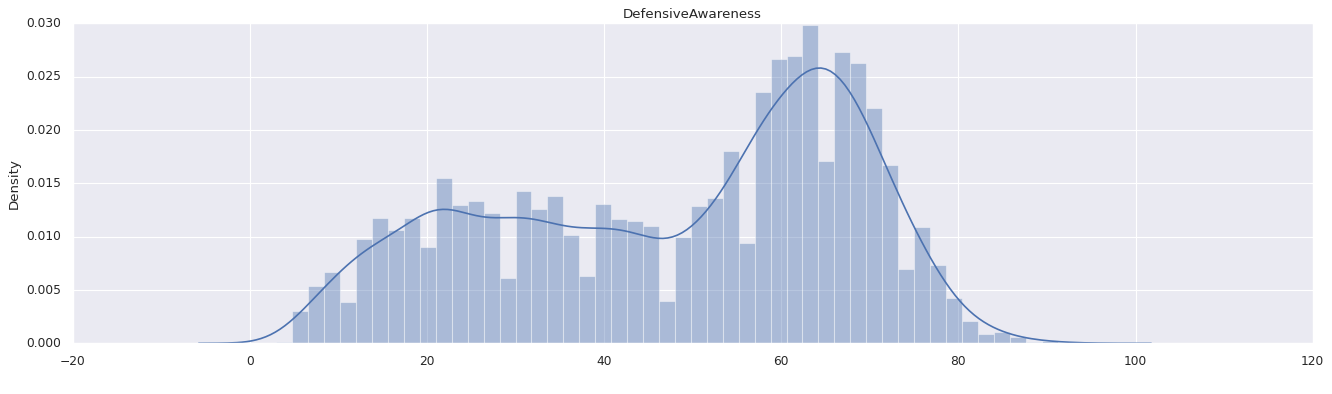

In [34]:
# Checking feature "DefensiveAwareness"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(fifa_data["DefensiveAwareness"], bins=50 , ax=ax1)
ax1.set_title("DefensiveAwareness")
ax1.set_xlabel(" ");

In [35]:
da_by_position = fifa_data.groupby(by=["Best Position"]).median(numeric_only=True)
da_by_position = da_by_position[["DefensiveAwareness"]]
da_by_position.columns = ["DefensiveAwareness_Median"]
da_by_position = da_by_position.reset_index()
fifa_data = pd.merge(fifa_data, da_by_position, how="left", on=["Best Position"])
# Filling the missing values with median value for respective position

fifa_data["DefensiveAwareness"].fillna(fifa_data["DefensiveAwareness_Median"], inplace=True)

In [36]:
comp_by_position = fifa_data.groupby(by=["Best Position"]).median(numeric_only=True)
comp_by_position = comp_by_position[["Composure"]]
comp_by_position.columns = ["Composure_Median"]
comp_by_position = comp_by_position.reset_index()
fifa_data = pd.merge(fifa_data, comp_by_position, how="left", on=["Best Position"])
# Filling the missing values with median value for respective position

fifa_data["Composure"].fillna(fifa_data["Composure_Median"], inplace=True)

In [37]:
fifa_data = fifa_data.drop(["DefensiveAwareness_Median", "Composure_Median"], axis=1)

#### **3.1.4 Cleaning records**

Some of the records have incorrect positions listed that needs to be corrected for better prediction.

In [38]:
position_map = {'CAM':"AM", 'CB':"CB", 'CDM':"DM", 'CF':"ST", 'CM':"CM", 'GK':"GK", 'LB':"LB", 'LM':"LW", 'LW':"LW", 'LWB':"LB",
                'RB':"RB", 'RM':"RW", 'RW':"RW", 'RWB':"RB", 'ST':"ST"}

In [39]:
# Clubbed few positions to reduce grouping

fifa_data["Best Position"] = fifa_data["Best Position"].map(position_map)

In [40]:
# Correcting the position of some top players

fifa_data.at[104, "Best Position"] = "DM"
fifa_data.at[75, "Best Position"] = "LW"
fifa_data.at[211, "Best Position"] = "RB"
fifa_data.at[1, "Best Position"] = "LW"
fifa_data.at[30, "Best Position"] = "RW"
fifa_data.at[64, "Best Position"] = "ST"
fifa_data.at[76, "Best Position"] = "RW"
fifa_data.at[171, "Best Position"] = "LW"
fifa_data.at[467, "Best Position"] = "LB"
fifa_data.at[58, "Best Position"] = "CM"
fifa_data.at[400, "Best Position"] = "CM"
fifa_data.at[284, "Best Position"] = "CM"
fifa_data.at[346, "Best Position"] = "CM"
fifa_data.at[477, "Best Position"] = "CM"
fifa_data.at[493, "Best Position"] = "LW"
fifa_data.at[129, "Best Position"] = "DM"
fifa_data.at[130, "Best Position"] = "DM"
fifa_data.at[207, "Best Position"] = "DM"
fifa_data.at[49, "Club"] = 'Manchester United'

In [41]:
position_category = {'RW': "Forward", 'LW': "Forward", 'ST': "Forward", 'GK': "Goalkeeper", 'AM': "Midfielder",
                     'CB': "Defender", 'DM': "Midfielder", 'CM': "Midfielder", 'LB': "Defender", 'RB': "Defender"}
fifa_data["Position"] = fifa_data["Best Position"].map(position_category)

In [42]:
fifa_data = fifa_data[['Name', 'Nationality', 'Club', 'Age', 'Height', 'Weight', 'Value',
       'Wage','Position', 'Best Position', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Overall', 'Potential',
       'Best Overall Rating', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'DefensiveAwareness']]

In [43]:
fifa_data['Improvement Scope'] = fifa_data['Potential'] - fifa_data['Overall']

### **3.2 Exploratory Data Analysis**

After the data cleaning steps, we can now perform EDA on the dataset to discover patterns and relationships that will help in understanding the data better.

### **3.2.1 Univariate Analysis**

Analyzing each feature inidividually to gain insights from the data and discover any outliers.

In [44]:
# Checking the different "Nationality" in the dataset

fifa_data["Nationality"].value_counts()

,count
Nationality,
England,1777
Germany,1093
Spain,1087
France,937
Argentina,807
Brazil,726
Italy,458
Netherlands,423
Portugal,340


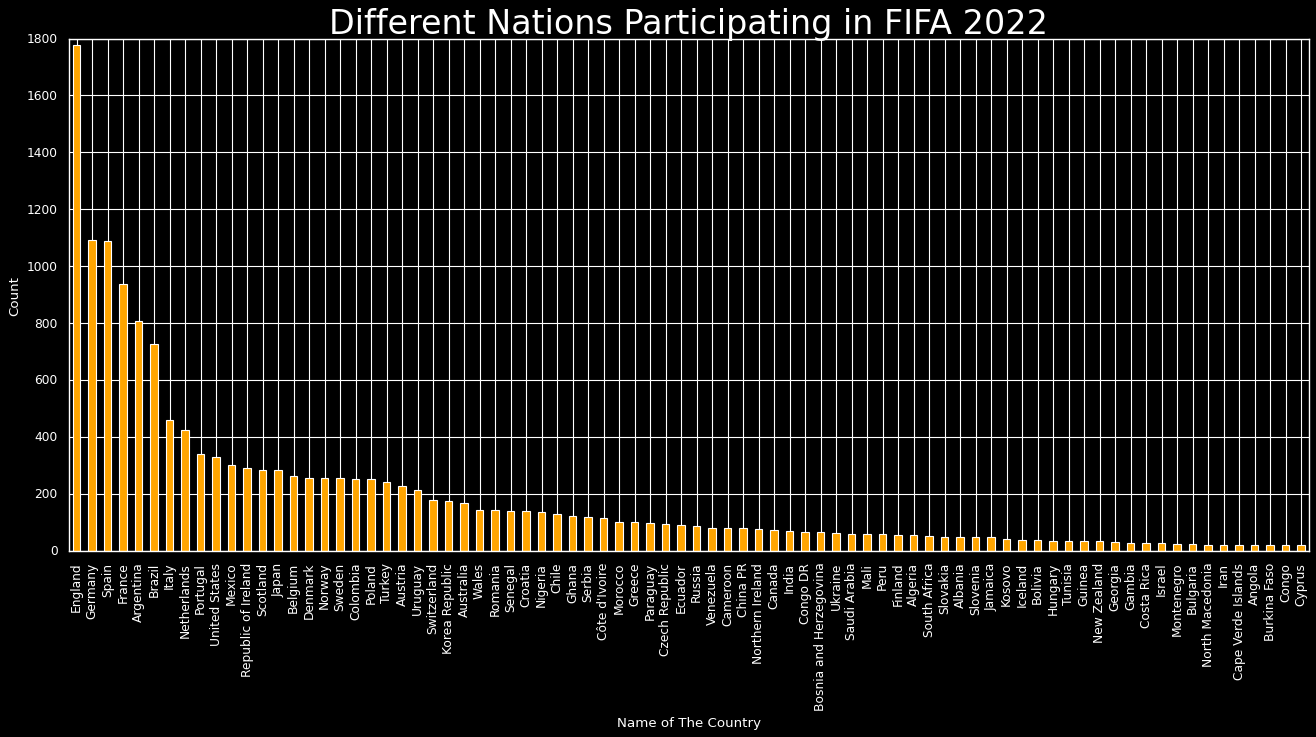

In [45]:
plt.style.use('dark_background')
fifa_data['Nationality'].value_counts().head(80).plot.bar(color = 'orange', figsize = (20, 8))
plt.title('Different Nations Participating in FIFA 2022', fontsize = 30, fontweight = 20)
plt.xlabel('Name of The Country')
plt.ylabel('Count')
plt.show()

In [46]:
# Checking the different "Nationality" in the dataset

fifa_data["Club"].value_counts()

,count
Club,
Lazio,42
Hertha BSC,40
FC Lokomotiv Moscow,39
Cádiz CF,39
Borussia Mönchengladbach,39
...,...
Club Deportivo Guabirá,1
Longford Town,1
Liverpool Fútbol Club,1


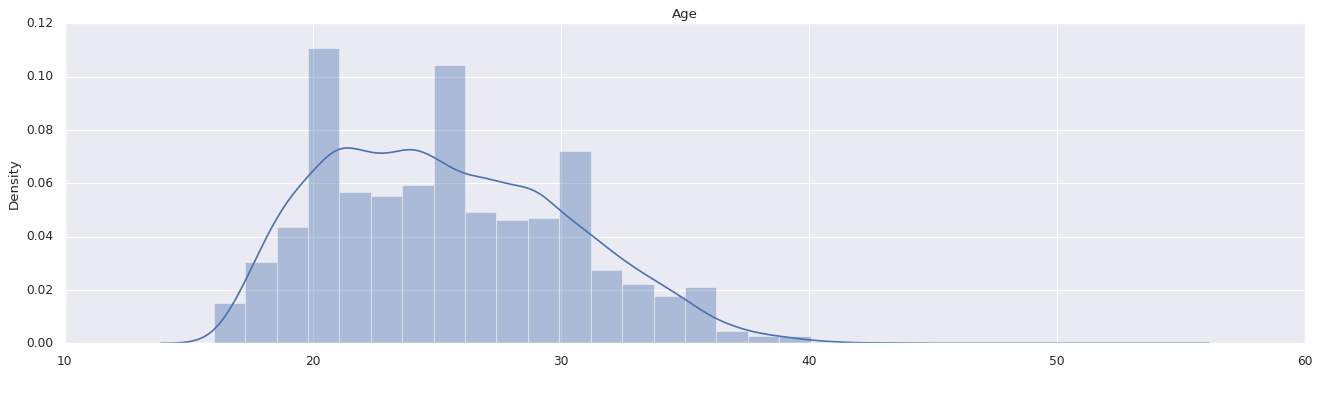

In [47]:
# Checking feature "Age"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(fifa_data["Age"], bins=30 , ax=ax1)
ax1.set_title("Age")
ax1.set_xlabel(" ");

##### Obserations:
1. Most of the players lie in the range of 20-30 which is the peak age group of professional football players.


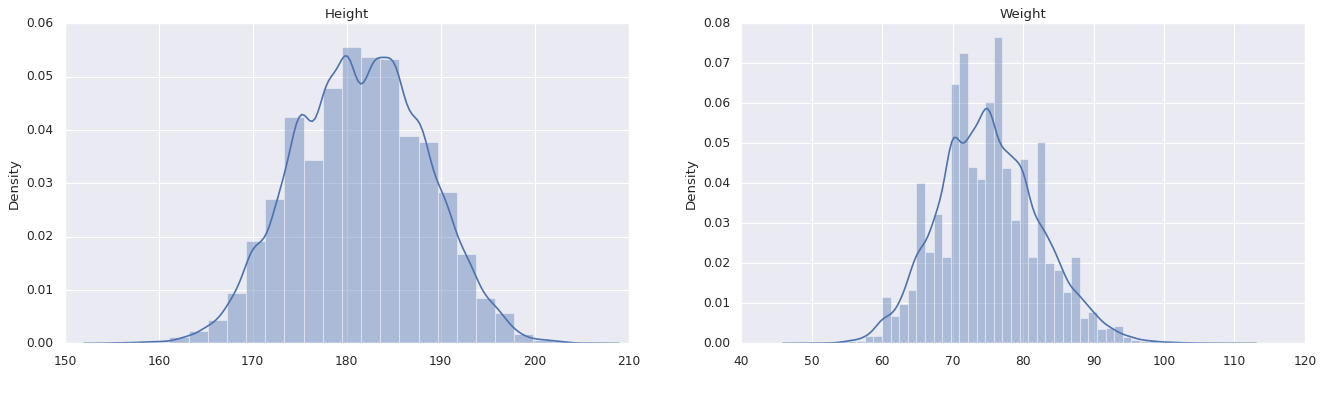

In [48]:
# Checking feature "Age"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
fig, (ax1, ax2) = plot_objects

sns.distplot(fifa_data["Height"], bins=25 , ax=ax1)
ax1.set_title("Height")
ax1.set_xlabel(" ")

sns.distplot(fifa_data["Weight"], bins=50 , ax=ax2)
ax2.set_title("Weight")
ax2.set_xlabel(" ");

##### Observations:
1. Most of the players have the height in the range of 175cm to 190cm.
2. Most of the players have the weight in the range of 70kg to 80kg.

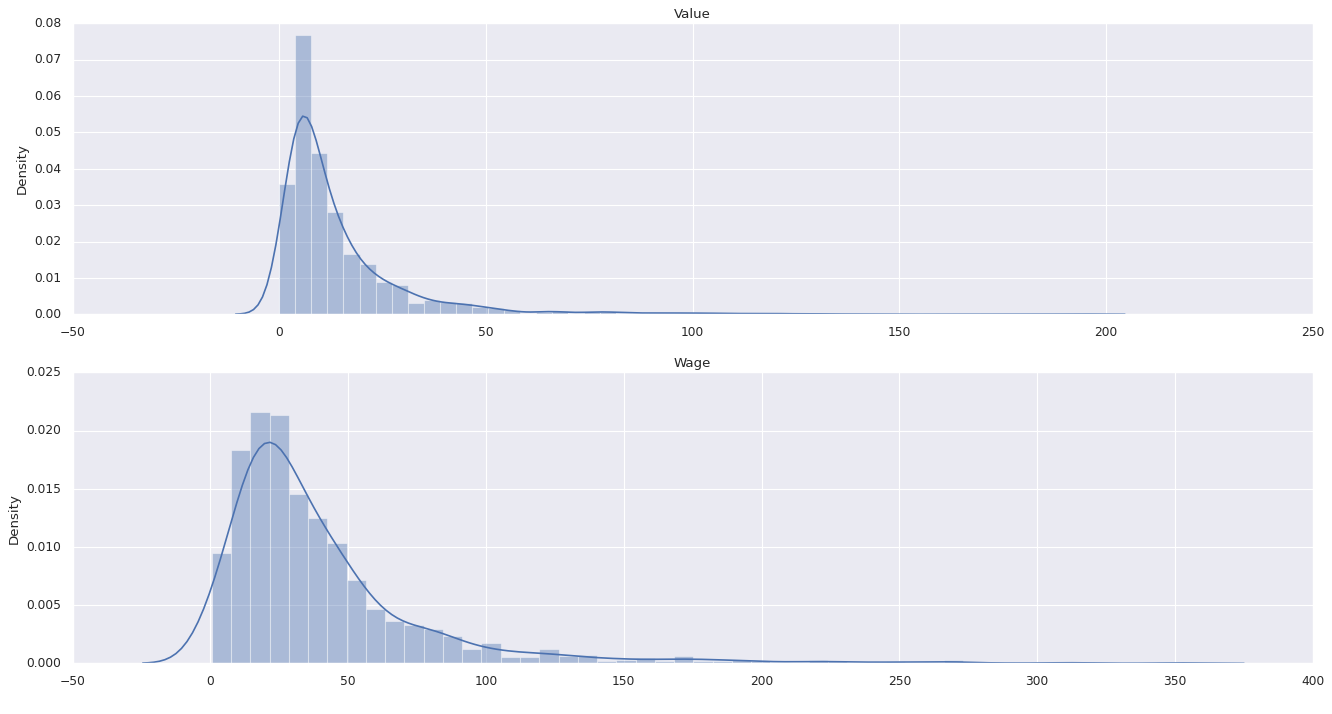

In [49]:
# Checking feature "Value" and "Wage"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))
fig, (ax1, ax2) = plot_objects

sns.distplot(fifa_data.iloc[0:2500]["Value"], bins=50 , ax=ax1)
ax1.set_title("Value")
ax1.set_xlabel(" ")

sns.distplot(fifa_data.iloc[0:2500]["Wage"], bins=50 , ax=ax2)
ax2.set_title("Wage")
ax2.set_xlabel(" ");

##### Observations:
1. Since there are around 16K+ players, the features "Value" and "Wage" would be highly skewed, therefore, taking top 500 players based on "Overall"
2. "Value" indicates that most the top players market value lies in between 10M Euros to 40M Euros
3. "Wages" seems to have a right skewed distribution. Most of the players have wages in between 0.5K Euros to 560K Euros

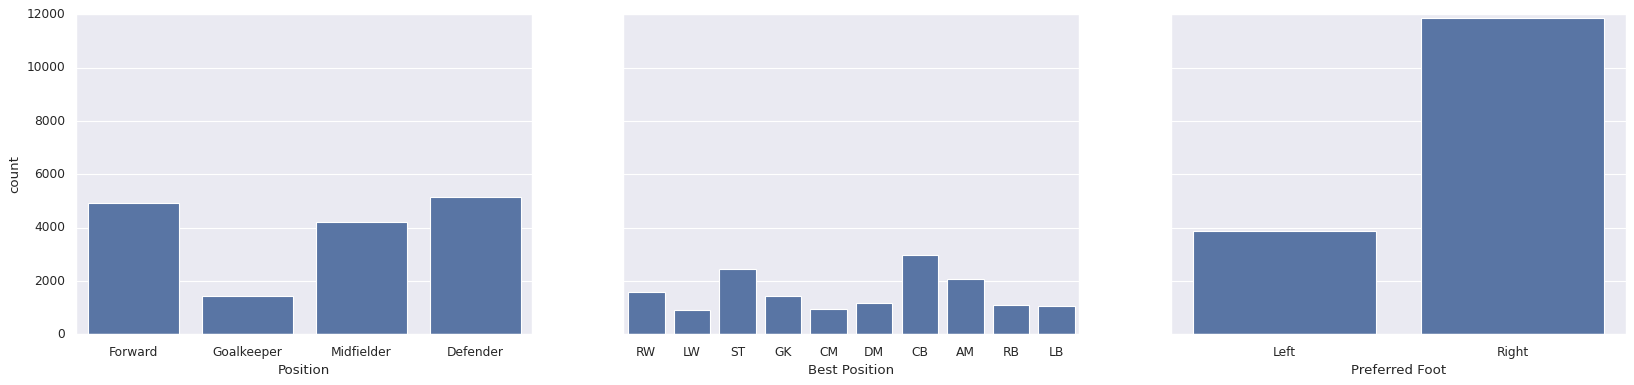

In [50]:
# Plotting the countplot for the "Position"

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 3, figsize=(25, 5), sharey=True)

sns.countplot(x="Position", data=fifa_data, ax=axes[0])
sns.countplot(x="Best Position", data=fifa_data, ax=axes[1])
sns.countplot(x="Preferred Foot", data=fifa_data, ax=axes[2]);

##### Observations:
1. There are more than 5000+ "Defenders" in the dataset, followed by Forwards, Midfielders and Goalkeepers.
2. "CB" are the highest in the dataset, the reason could be due to the fact that a team plays 2 or 3 CBs in a match.
3. "ST" are the second-highest sections of players present in the dataset.
4. Majority of the player's preferred foot is "Right".


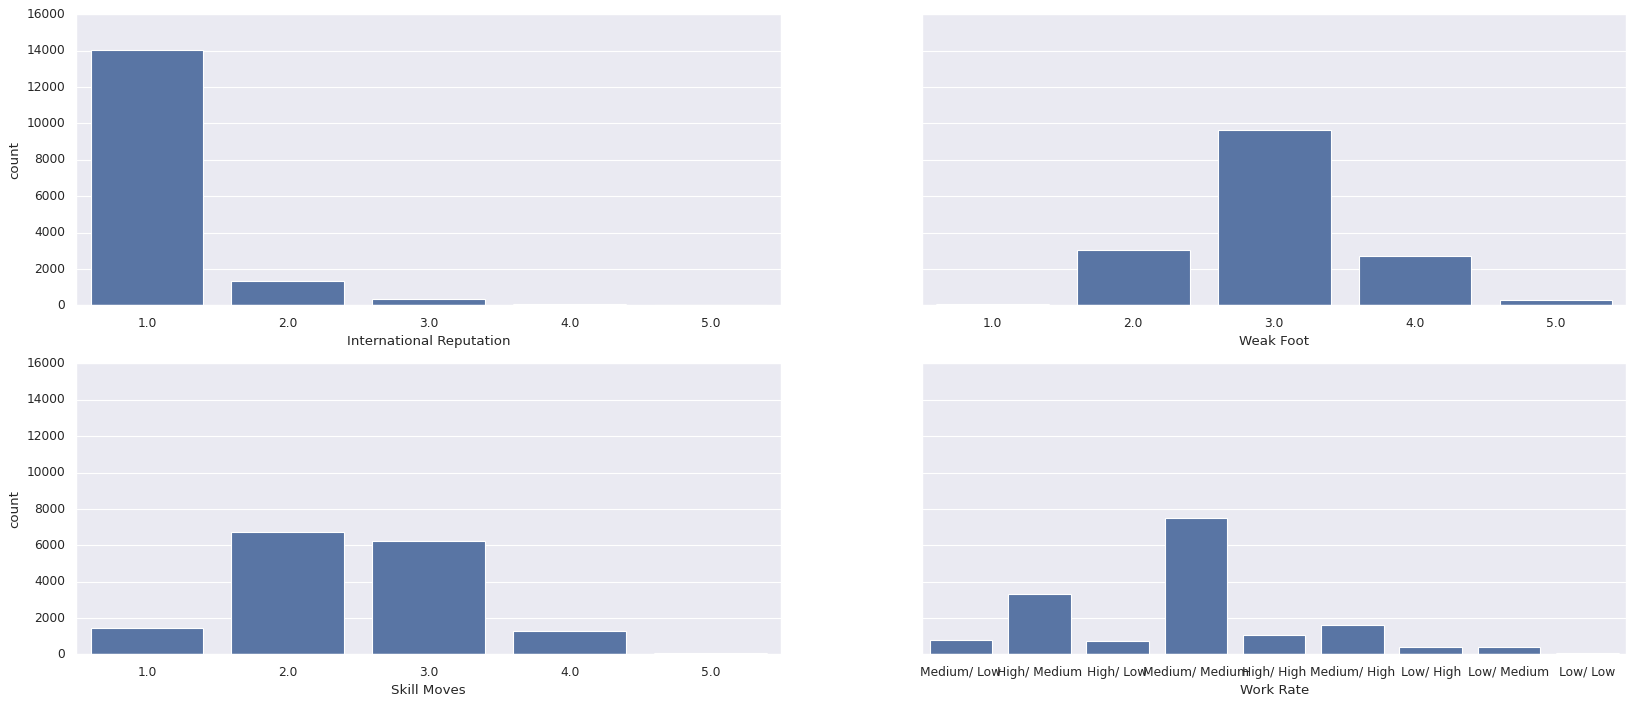

In [51]:
# Plotting the countplot for the "International Reputation", "Weak Foot", "Skill Moves" and "Work Rate"

sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 2, figsize=(25, 10), sharey=True)
sns.countplot(x="International Reputation", data=fifa_data, ax=axes[0,0])
sns.countplot(x="Weak Foot", data=fifa_data, ax=axes[0,1])
sns.countplot(x="Skill Moves", data=fifa_data, ax=axes[1,0])
sns.countplot(x="Work Rate", data=fifa_data, ax=axes[1,1]);

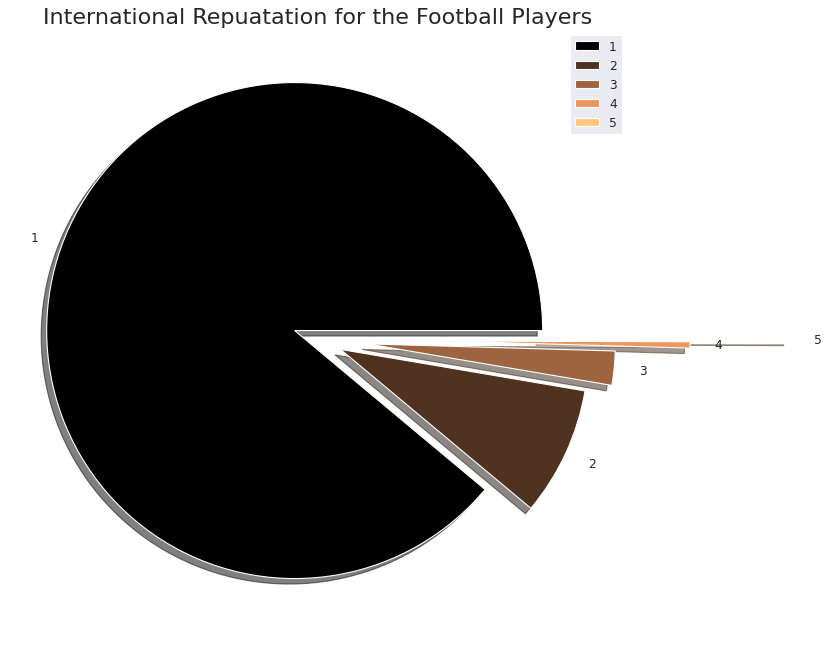

In [52]:
# plotting a pie chart to represent share of international repuatation

labels = ['1', '2', '3', '4', '5']
sizes = fifa_data['International Reputation'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0.1, 0.1, 0.2, 0.5, 0.9]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('International Repuatation for the Football Players', fontsize = 20)
plt.legend()
plt.show()

##### Observations:
1. Due to large set of players, over 14K+ players have the lowest "internation reputation" of 1.
2. Majority of the players have rating of 3 as "Weak Foot" which means neutral.
3. Rating of 2 and 3 are most common for "Skill Moves"
4. Medium/Medium is the most common "Work Rate"


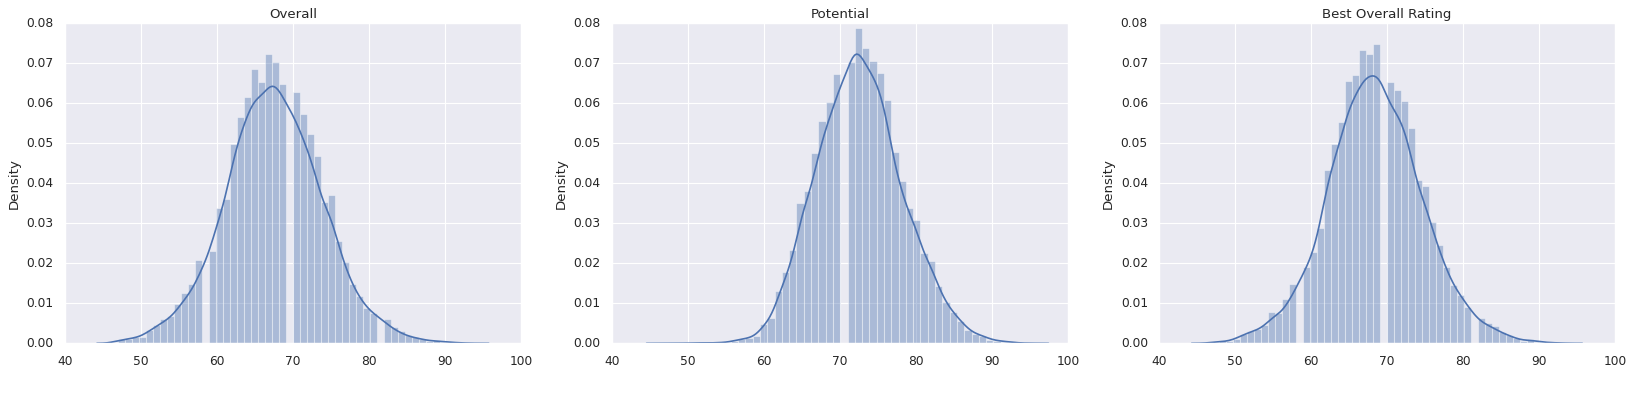

In [53]:
# Checking feature "Overall", "Potential", "Best Overall Rating"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
fig, (ax1, ax2, ax3) = plot_objects

sns.distplot(fifa_data["Overall"], bins=50 , ax=ax1)
ax1.set_title("Overall")
ax1.set_xlabel(" ")

sns.distplot(fifa_data["Potential"], bins=50 , ax=ax2)
ax2.set_title("Potential")
ax2.set_xlabel(" ")

sns.distplot(fifa_data["Best Overall Rating"], bins=50 , ax=ax3)
ax3.set_title("Best Overall Rating")
ax3.set_xlabel(" ");

##### Observations:
1. The distribution seems to be normal for all three features.
2. Majority of the players rating is around ~70.


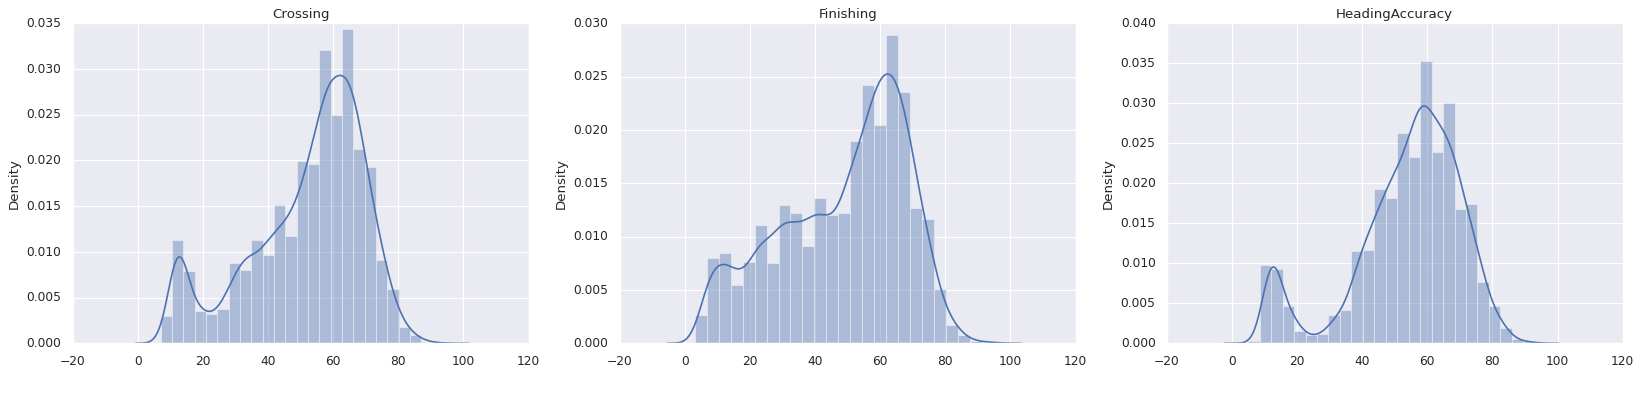

In [54]:
# Checking features "Crossing", "Finishing", "HeadingAccuracy"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
fig, (ax1, ax2, ax3) = plot_objects

sns.distplot(fifa_data["Crossing"], bins=25 , ax=ax1)
ax1.set_title("Crossing")
ax1.set_xlabel(" ")

sns.distplot(fifa_data["Finishing"], bins=25 , ax=ax2)
ax2.set_title("Finishing")
ax2.set_xlabel(" ")

sns.distplot(fifa_data["HeadingAccuracy"], bins=25 , ax=ax3)
ax3.set_title("HeadingAccuracy")
ax3.set_xlabel(" ");

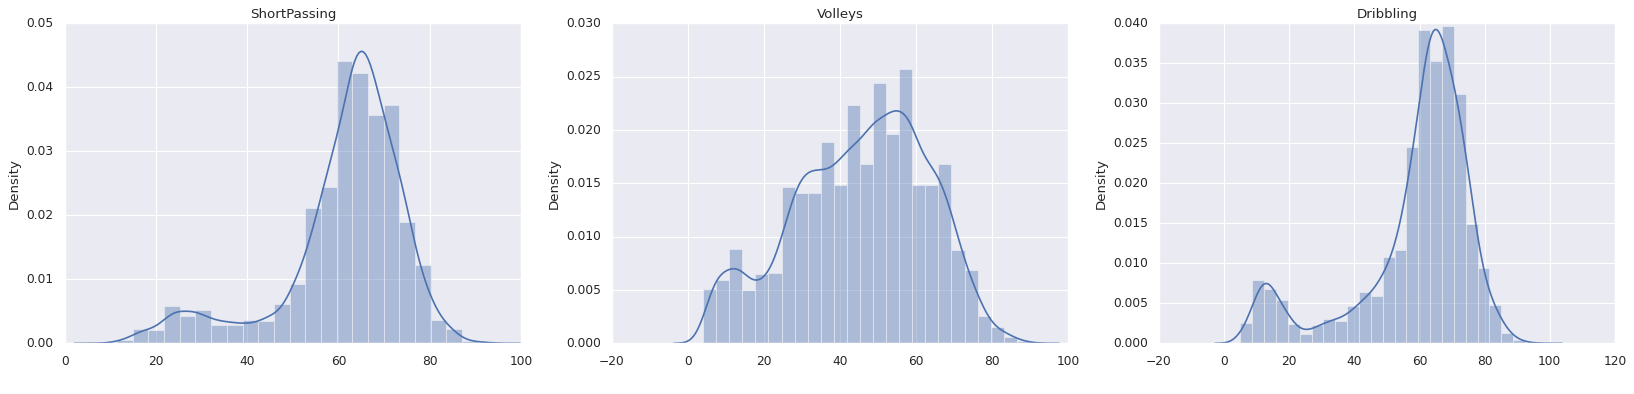

In [55]:
# Checking features "ShortPassing", "Volleys", "Dribbling"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
fig, (ax1, ax2, ax3) = plot_objects

sns.distplot(fifa_data["ShortPassing"], bins=25 , ax=ax1)
ax1.set_title("ShortPassing")
ax1.set_xlabel(" ")

sns.distplot(fifa_data["Volleys"], bins=25 , ax=ax2)
ax2.set_title("Volleys")
ax2.set_xlabel(" ")

sns.distplot(fifa_data["Dribbling"], bins=25 , ax=ax3)
ax3.set_title("Dribbling")
ax3.set_xlabel(" ");

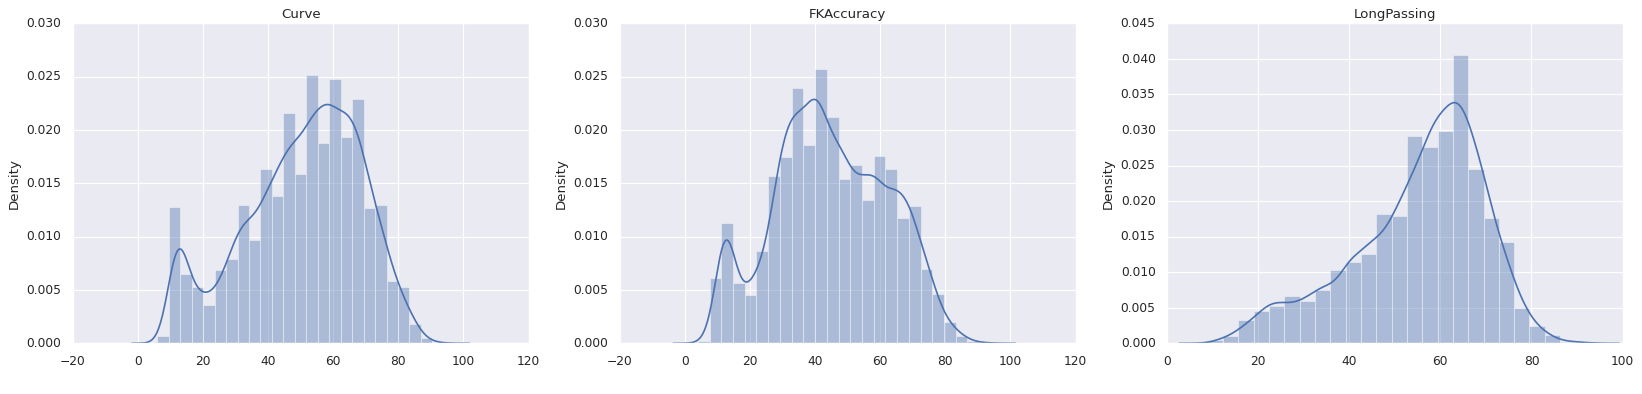

In [56]:
# Checking features "Curve", "FKAccuracy", "LongPassing"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
fig, (ax1, ax2, ax3) = plot_objects

sns.distplot(fifa_data["Curve"], bins=25 , ax=ax1)
ax1.set_title("Curve")
ax1.set_xlabel(" ")

sns.distplot(fifa_data["FKAccuracy"], bins=25 , ax=ax2)
ax2.set_title("FKAccuracy")
ax2.set_xlabel(" ")

sns.distplot(fifa_data["LongPassing"], bins=25 , ax=ax3)
ax3.set_title("LongPassing")
ax3.set_xlabel(" ");

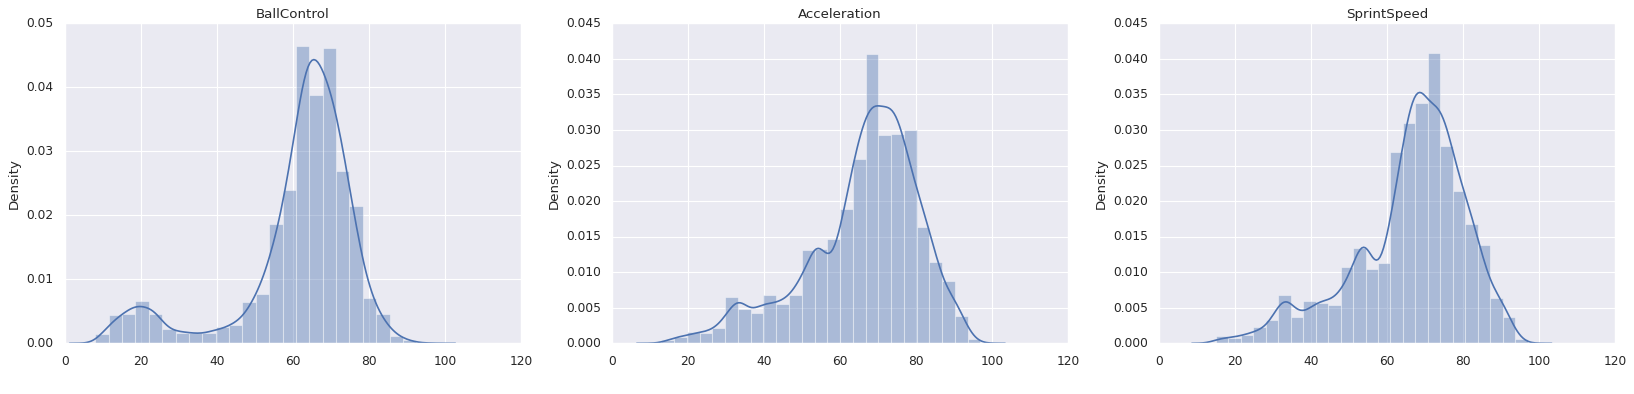

In [57]:
# Checking features "BallControl", "Acceleration", "SprintSpeed"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
fig, (ax1, ax2, ax3) = plot_objects

sns.distplot(fifa_data["BallControl"], bins=25 , ax=ax1)
ax1.set_title("BallControl")
ax1.set_xlabel(" ")

sns.distplot(fifa_data["Acceleration"], bins=25 , ax=ax2)
ax2.set_title("Acceleration")
ax2.set_xlabel(" ")

sns.distplot(fifa_data["SprintSpeed"], bins=25 , ax=ax3)
ax3.set_title("SprintSpeed")
ax3.set_xlabel(" ");

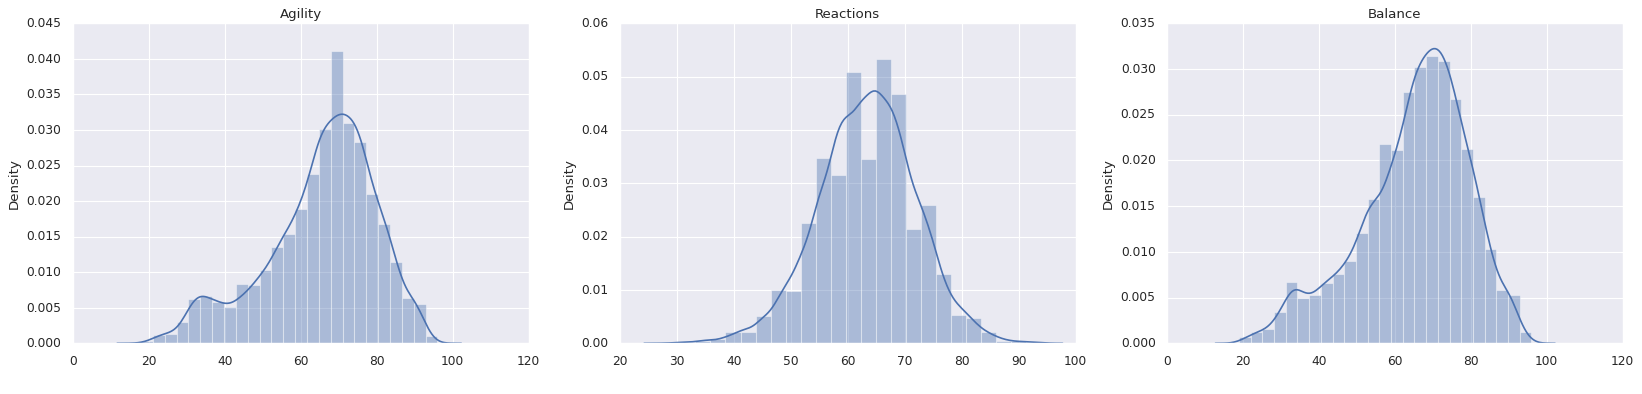

In [58]:
# Checking features "Agility", "Reactions", "Balance"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
fig, (ax1, ax2, ax3) = plot_objects

sns.distplot(fifa_data["Agility"], bins=25 , ax=ax1)
ax1.set_title("Agility")
ax1.set_xlabel(" ")

sns.distplot(fifa_data["Reactions"], bins=25 , ax=ax2)
ax2.set_title("Reactions")
ax2.set_xlabel(" ")

sns.distplot(fifa_data["Balance"], bins=25 , ax=ax3)
ax3.set_title("Balance")
ax3.set_xlabel(" ");

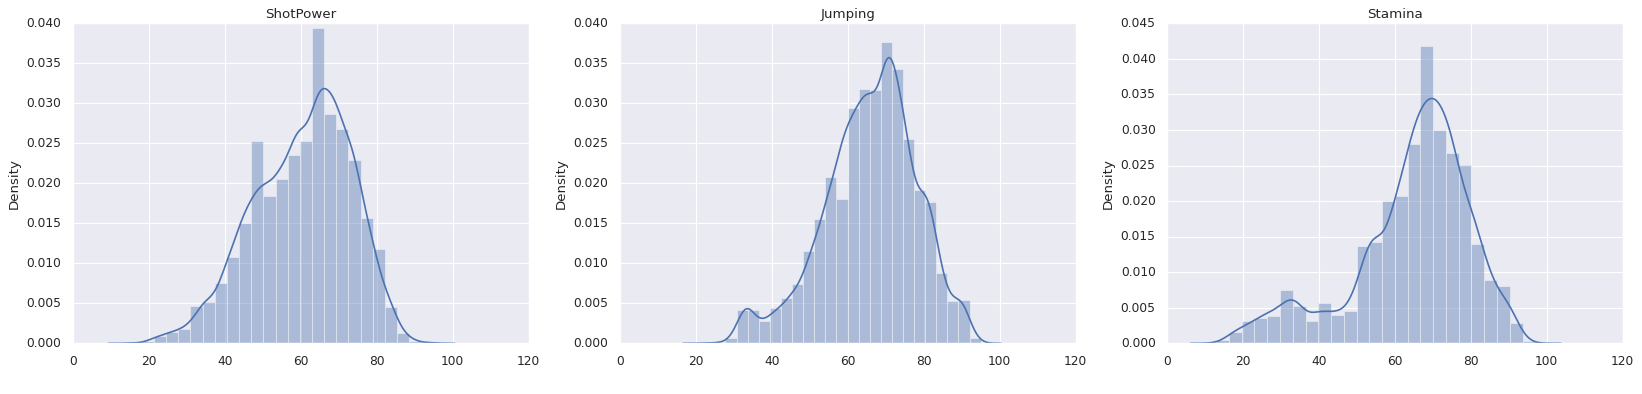

In [59]:
# Checking features "ShotPower", "Jumping", "Stamina"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
fig, (ax1, ax2, ax3) = plot_objects

sns.distplot(fifa_data["ShotPower"], bins=25 , ax=ax1)
ax1.set_title("ShotPower")
ax1.set_xlabel(" ")

sns.distplot(fifa_data["Jumping"], bins=25 , ax=ax2)
ax2.set_title("Jumping")
ax2.set_xlabel(" ")

sns.distplot(fifa_data["Stamina"], bins=25 , ax=ax3)
ax3.set_title("Stamina")
ax3.set_xlabel(" ");

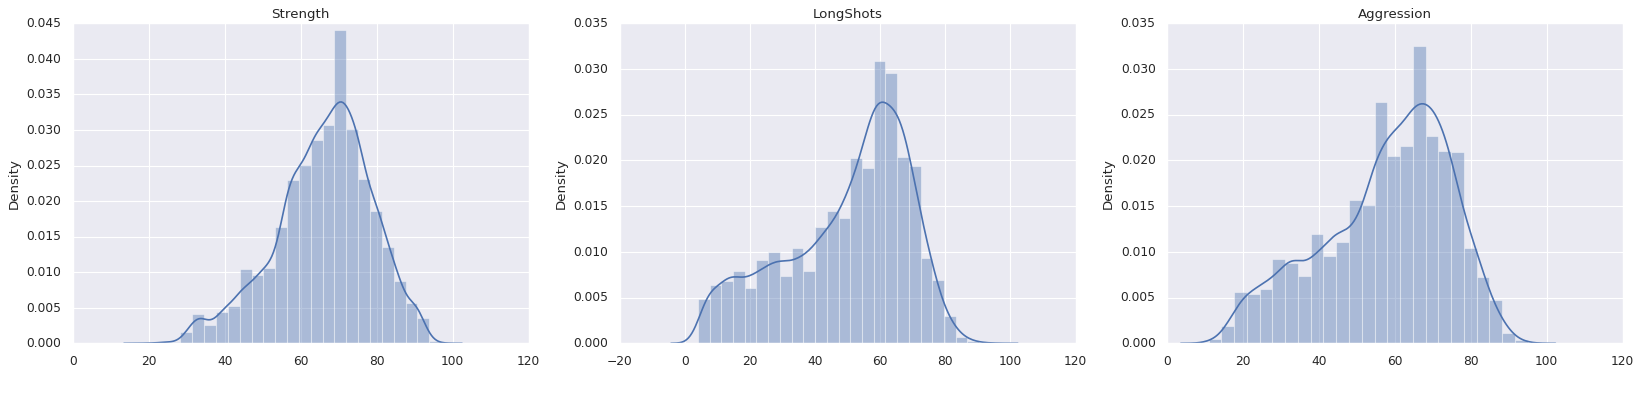

In [60]:
# Checking features "Strength", "LongShots", "Aggression"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
fig, (ax1, ax2, ax3) = plot_objects

sns.distplot(fifa_data["Strength"], bins=25 , ax=ax1)
ax1.set_title("Strength")
ax1.set_xlabel(" ")

sns.distplot(fifa_data["LongShots"], bins=25 , ax=ax2)
ax2.set_title("LongShots")
ax2.set_xlabel(" ")

sns.distplot(fifa_data["Aggression"], bins=25 , ax=ax3)
ax3.set_title("Aggression")
ax3.set_xlabel(" ");

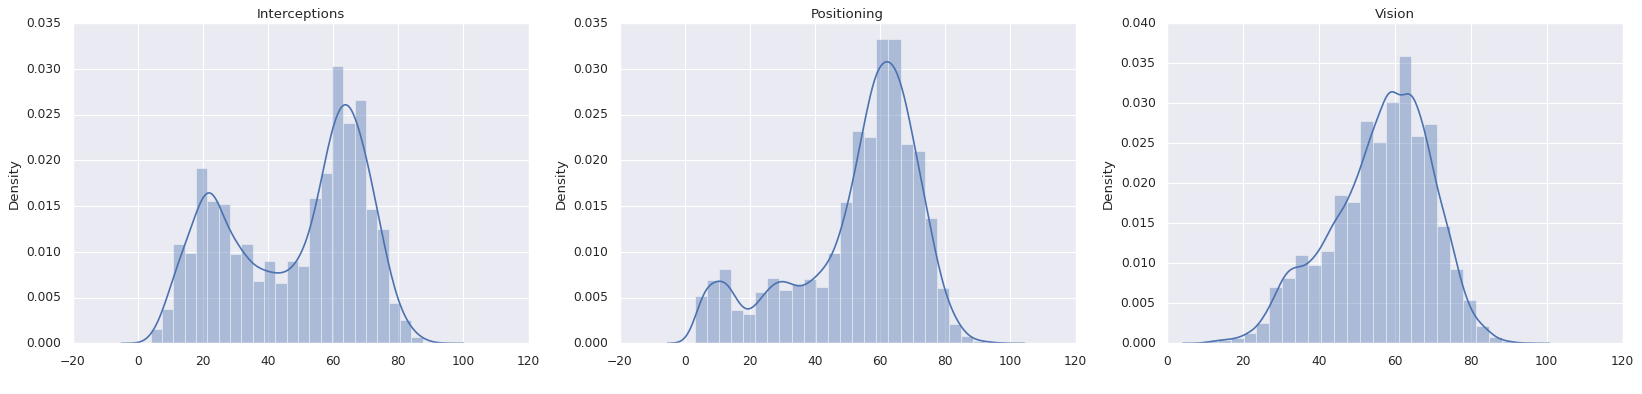

In [61]:
# Checking features "Interceptions", "Positioning", "Vision"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
fig, (ax1, ax2, ax3) = plot_objects

sns.distplot(fifa_data["Interceptions"], bins=25 , ax=ax1)
ax1.set_title("Interceptions")
ax1.set_xlabel(" ")

sns.distplot(fifa_data["Positioning"], bins=25 , ax=ax2)
ax2.set_title("Positioning")
ax2.set_xlabel(" ")

sns.distplot(fifa_data["Vision"], bins=25 , ax=ax3)
ax3.set_title("Vision")
ax3.set_xlabel(" ");

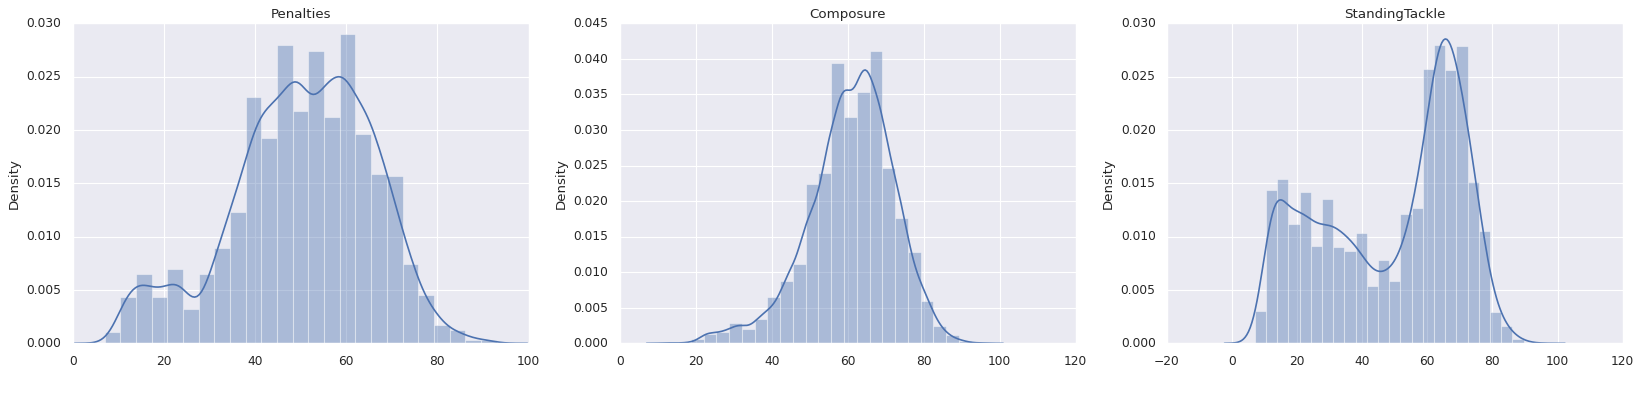

In [62]:
# Checking features "Penalties", "Composure", "StandingTackle"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
fig, (ax1, ax2, ax3) = plot_objects

sns.distplot(fifa_data["Penalties"], bins=25 , ax=ax1)
ax1.set_title("Penalties")
ax1.set_xlabel(" ")

sns.distplot(fifa_data["Composure"], bins=25 , ax=ax2)
ax2.set_title("Composure")
ax2.set_xlabel(" ")

sns.distplot(fifa_data["StandingTackle"], bins=25 , ax=ax3)
ax3.set_title("StandingTackle")
ax3.set_xlabel(" ");

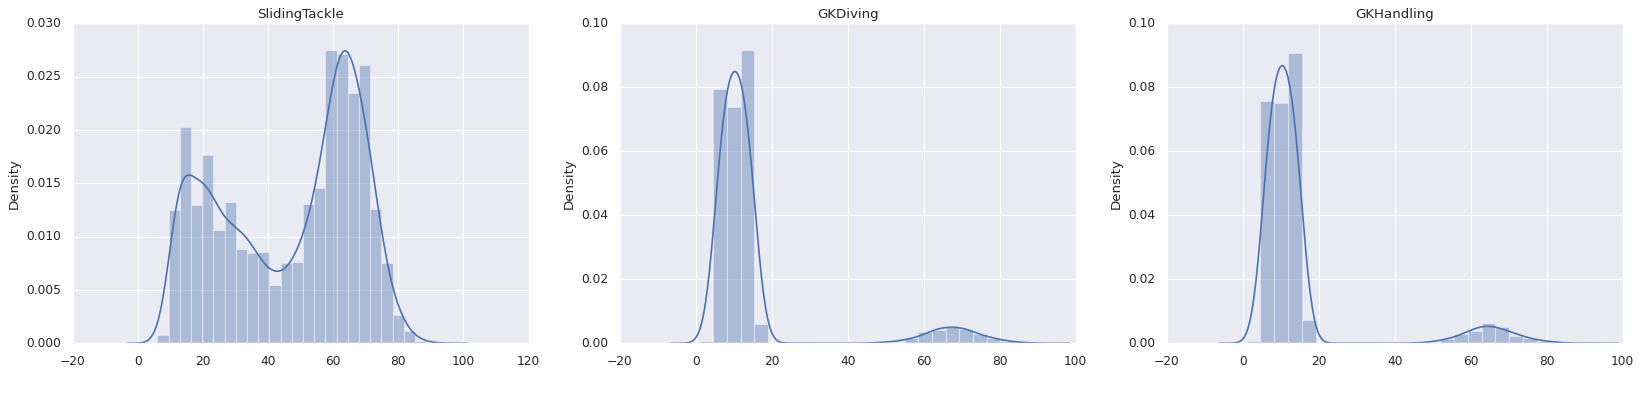

In [63]:
# Checking features "SlidingTackle", "GKDiving", "GKHandling"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
fig, (ax1, ax2, ax3) = plot_objects

sns.distplot(fifa_data["SlidingTackle"], bins=25 , ax=ax1)
ax1.set_title("SlidingTackle")
ax1.set_xlabel(" ")

sns.distplot(fifa_data["GKDiving"], bins=25 , ax=ax2)
ax2.set_title("GKDiving")
ax2.set_xlabel(" ")

sns.distplot(fifa_data["GKHandling"], bins=25 , ax=ax3)
ax3.set_title("GKHandling")
ax3.set_xlabel(" ");

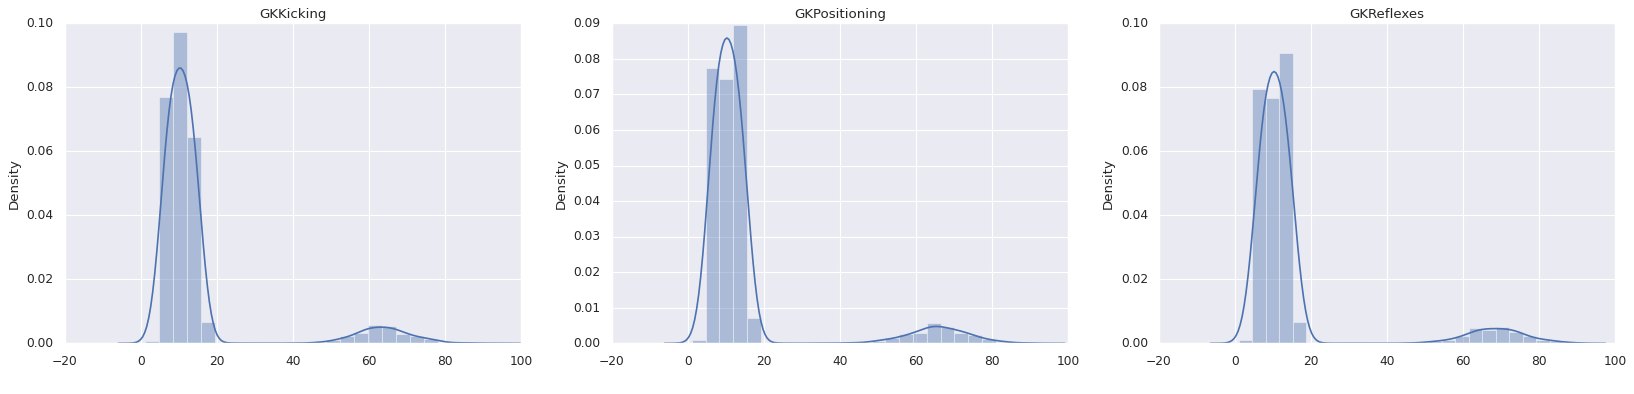

In [64]:
# Checking features "GKKicking", "GKPositioning", "GKReflexes"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
fig, (ax1, ax2, ax3) = plot_objects

sns.distplot(fifa_data["GKKicking"], bins=25 , ax=ax1)
ax1.set_title("GKKicking")
ax1.set_xlabel(" ")

sns.distplot(fifa_data["GKPositioning"], bins=25 , ax=ax2)
ax2.set_title("GKPositioning")
ax2.set_xlabel(" ")

sns.distplot(fifa_data["GKReflexes"], bins=25 , ax=ax3)
ax3.set_title("GKReflexes")
ax3.set_xlabel(" ");

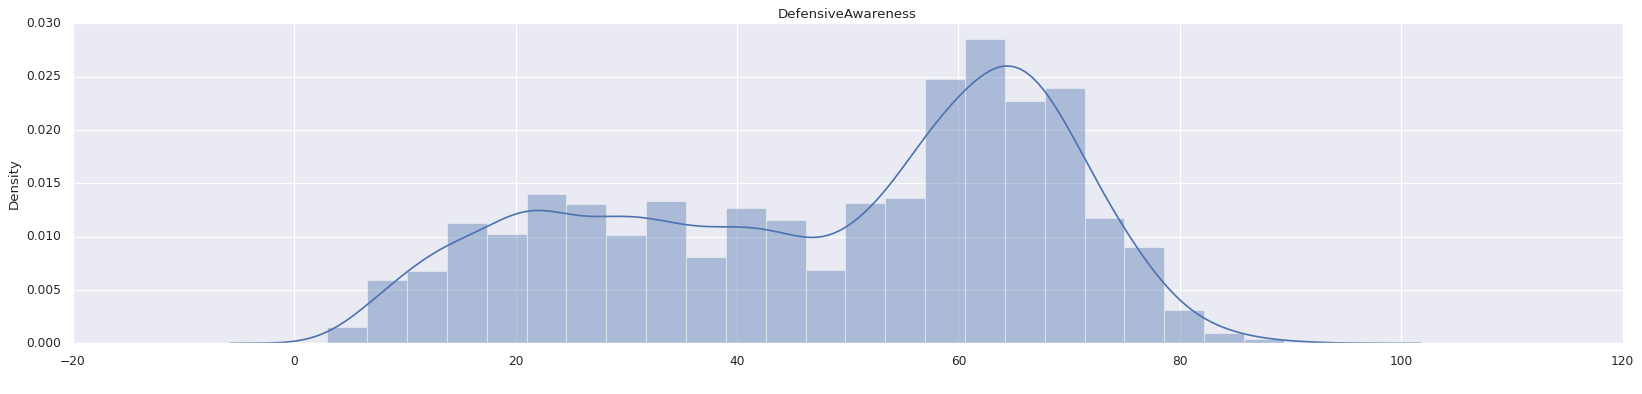

In [65]:
# Checking feature "DefensiveAwareness"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(25, 5))
fig, ax1 = plot_objects

sns.distplot(fifa_data["DefensiveAwareness"], bins=25 , ax=ax1)
ax1.set_title("DefensiveAwareness")
ax1.set_xlabel(" ");

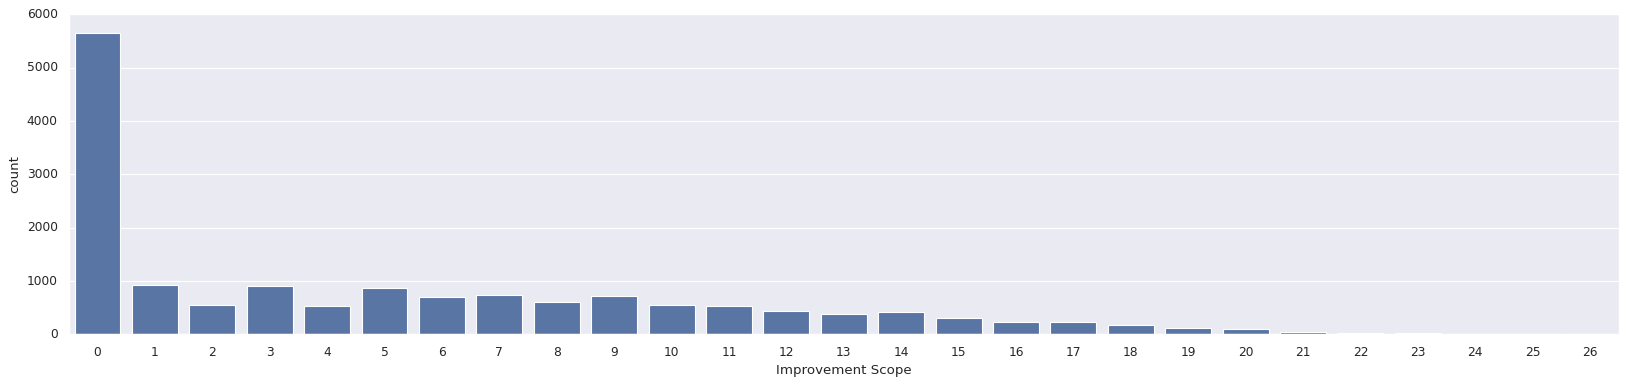

In [66]:
# Plotting the countplot for the "Improvement Scope"

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5), sharey=True)

sns.countplot(x="Improvement Scope", data=fifa_data, ax=axes);

##### Observations:
1. There are many players who have a good potential for the future.
2. All the attributes have a normal looking distribution with range 60-80 being the most common values for different attributes.


### **3.2.2 Bi-variate Analysis**

Analyzing multiple features together to discover relations, correlations and patterns.

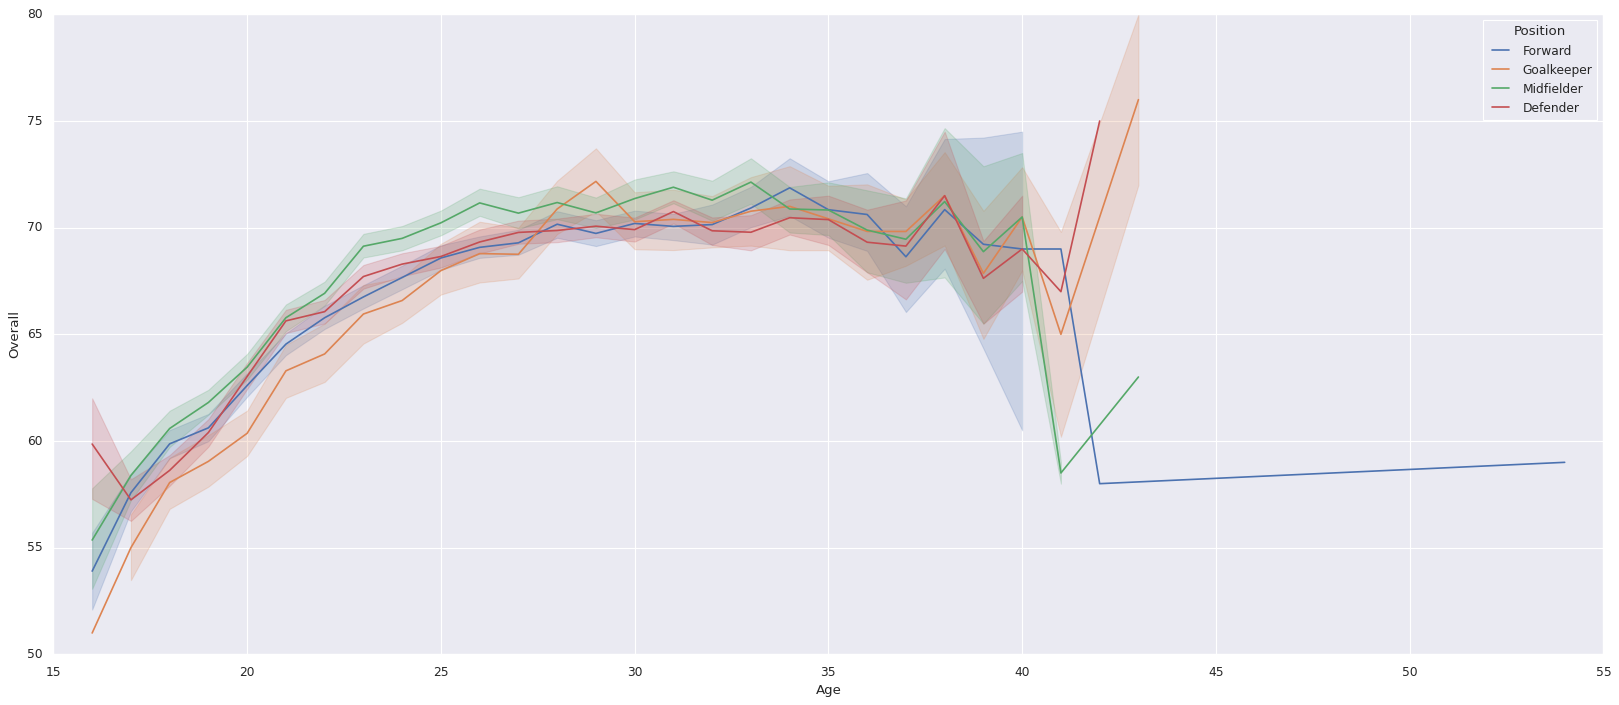

In [67]:
# Checking the trend of Overall for each main position with Age

fig, ax = plt.subplots(figsize=(25, 10))
sns.lineplot(x="Age", y="Overall", hue="Position", data=fifa_data, ax=ax);

Observations:
1. The players tend to improve with age untill 30 which is considered to be threshold of a athlete's career, post this the average ratings tend to decline.
2. Out of the 4 positions, "Goalkeepers", seems to improve till 30 and remain same till 35 and then their ratings decline.
3. "Defenders" seems to decline earlier as compared to other positions.

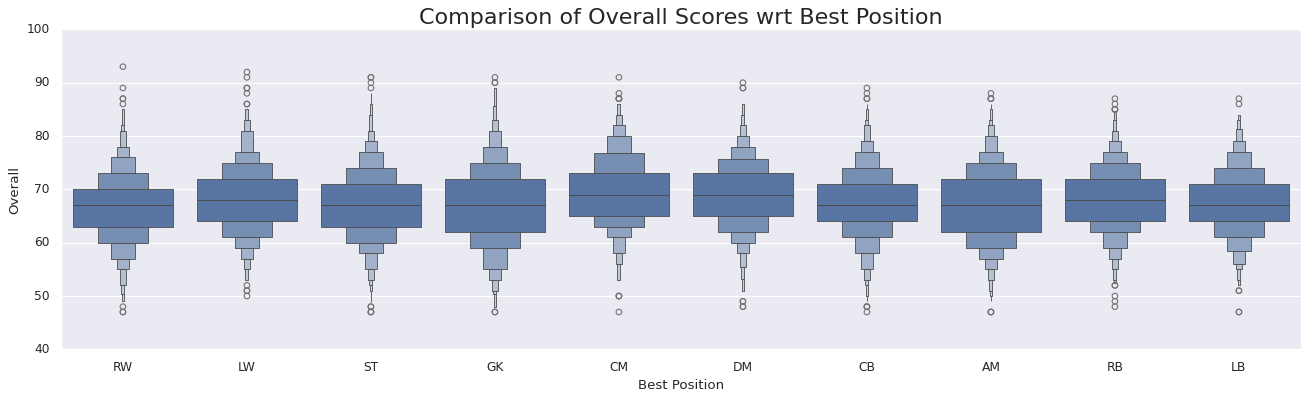

In [68]:
# Comparison of Overall Scores wrt Best Position

plt.rcParams['figure.figsize'] = (20, 5)
sns.boxenplot(x=fifa_data['Best Position'], y=fifa_data['Overall'])
plt.title('Comparison of Overall Scores wrt Best Position', fontsize = 20)
plt.show()

##### Observations:
1. The average Overall score for all position is similar.


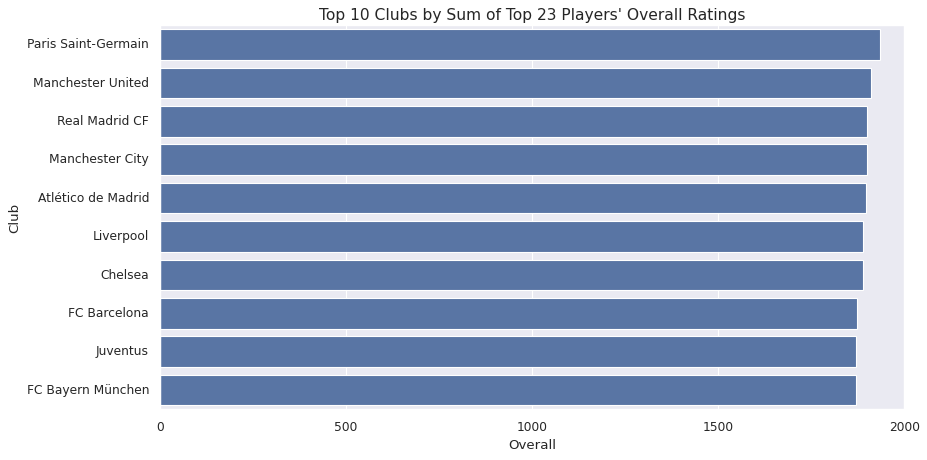

In [69]:
# Get the top 23 players from each club and sum their Overall ratings
top_clubs = (
    fifa_data.groupby("Club")["Overall"]
    .apply(lambda x: x.nlargest(23).sum())  # Sum the top 23 players per club
    .reset_index()
    .sort_values("Overall", ascending=False)
    .head(10)  # Get the top 10 clubs
)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(y='Club', x='Overall', data=top_clubs)
plt.title("Top 10 Clubs by Sum of Top 23 Players' Overall Ratings", fontsize=14)
plt.show()

Observations:
1. I took 23 players as the baseline, as usually a club has 20-25 players in their squad for the season.
2. While checking the top clubs, Paris Gaint-Germain came out to be the best team followed by Manchester City and Real Madrid.

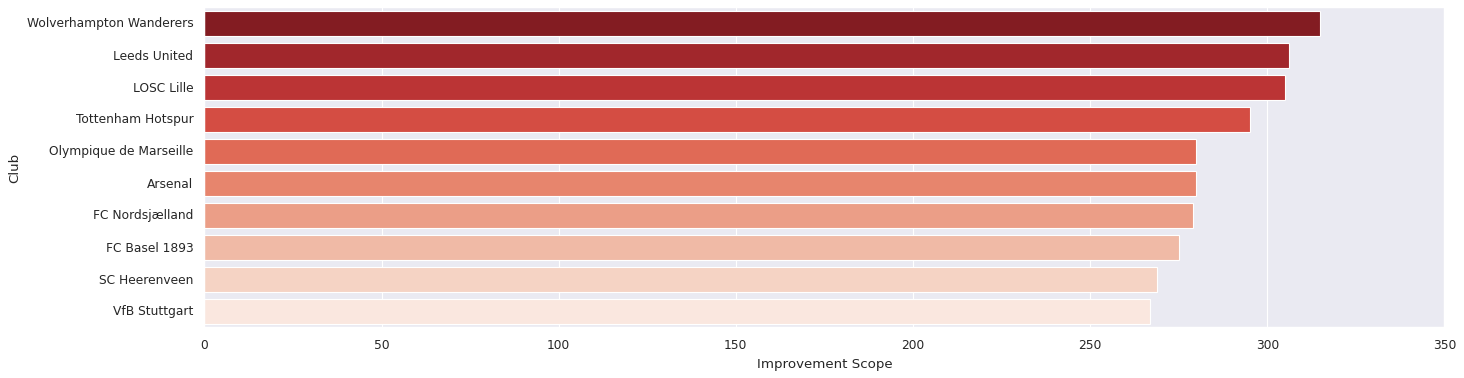

In [70]:
# Clubs with high improvement potential

top_clubs_to_improve = fifa_data.groupby(by=['Club'])['Improvement Scope'].sum().reset_index().sort_values(by=["Improvement Scope"], ascending=False).head(10)
sns.barplot(y='Club', x='Improvement Scope', data=top_clubs_to_improve, palette=sns.color_palette("Reds_r", 10));

Observations:
1. Major clubs like Tottenham Hotspur and Arsenal are playing under potential. Their squad can become better in the future.
2. Teams like Wolves,  Leeds and Lille have many players with high potenital.


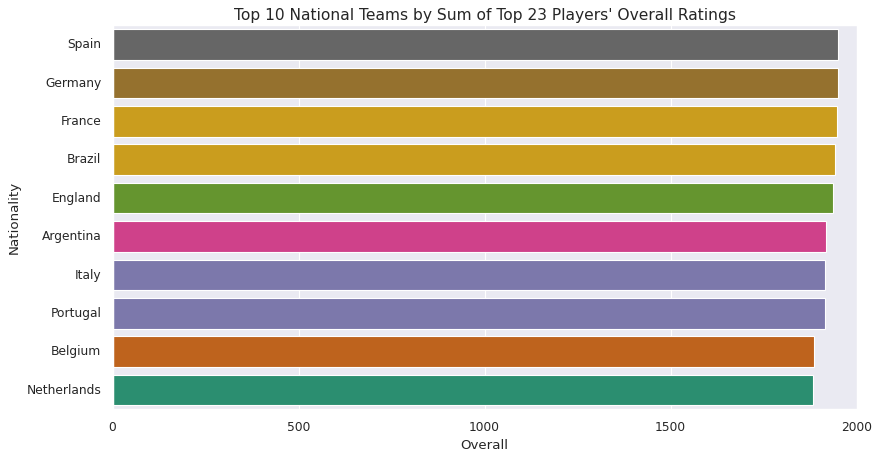

In [71]:
# Top international teams based on the sum of top 23 players' overall ratings
top_nations = (
    fifa_data.groupby("Nationality")["Overall"]
    .apply(lambda x: x.nlargest(23).sum())
    .reset_index()
    .sort_values("Overall", ascending=False)
    .head(10)
)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(
    y='Nationality',
    x='Overall',
    data=top_nations,
    palette=sns.color_palette("Dark2_r", 10)
)
plt.title("Top 10 National Teams by Sum of Top 23 Players' Overall Ratings", fontsize=14)
plt.show()

Observations:
1. 23 which is the usual squad strength was selected to calculate the top national team.
2. Spain, Germany, France and  Brazil seems to be the top national teams.

In [72]:
# Best player for each position with their age, club, and nationality based on their Overall score

fifa_data.iloc[fifa_data
               .groupby(fifa_data['Best Position'])['Overall']
               .idxmax()][['Best Position', 'Name', 'Age', 'Club', 'Nationality', 'Overall']]

,Best Position,Name,Age,Club,Nationality,Overall
28,AM,Bruno Fernandes,26,Manchester United,Portugal,88
17,CB,V. van Dijk,29,Liverpool,Netherlands,89
6,CM,K. De Bruyne,30,Manchester City,Belgium,91
8,DM,N. Kanté,30,Chelsea,France,90
4,GK,J. Oblak,28,Atlético de Madrid,Slovenia,91
35,LB,A. Robertson,27,Liverpool,Scotland,87
1,LW,R. Lewandowski,32,FC Bayern München,Poland,92
32,RB,T. Alexander-Arnold,22,Liverpool,England,87
0,RW,L. Messi,34,Paris Saint-Germain,Argentina,93
3,ST,K. Mbappé,22,Paris Saint-Germain,France,91


In [73]:
# Best player for each position with their age, club, and nationality based on their Imporvement Score

fifa_data.iloc[fifa_data.groupby(fifa_data['Best Position'])['Improvement Scope'].idxmax()][['Best Position', 'Name', 'Age', 'Club', 'Nationality', 'Overall', 'Potential']]

,Best Position,Name,Age,Club,Nationality,Overall,Potential
14097,AM,P. Dwomoh,17,Royal Antwerp FC,Belgium,60,85
14514,CB,R. van den Berg,16,PEC Zwolle,Netherlands,59,83
14452,CM,Bruno Iglesias,17,Real Madrid CF,Spain,59,83
13027,DM,C. Patino,17,Arsenal,England,62,85
15680,GK,C. Brady,17,Chicago Fire Football Club,United States,51,77
14507,LB,C. Wiggett,18,Newcastle United,England,59,80
15498,LW,B. Chrisene,17,Aston Villa,England,53,78
13752,RB,M. Paskotsi,18,Tottenham Hotspur,Estonia,60,80
15622,RW,A. Denholm,17,Heart of Midlothian,Scotland,52,77
15700,ST,A. Ferguson,16,St. Johnstone FC,Scotland,50,76


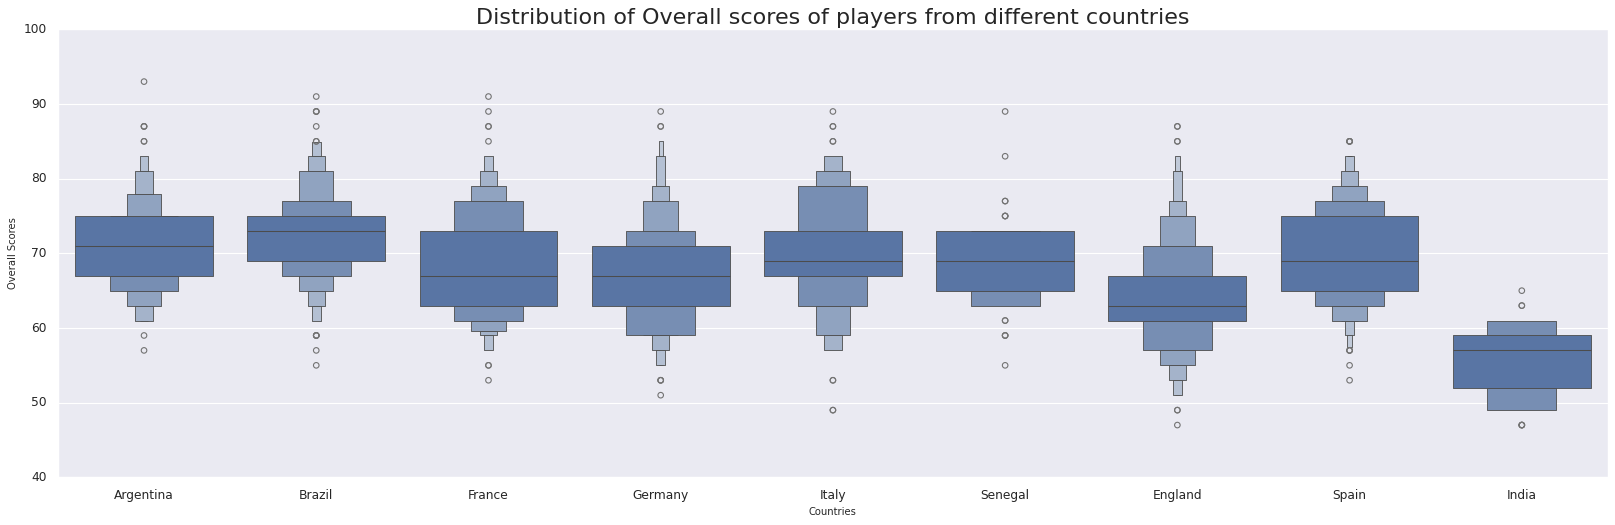

In [74]:
# Every Nations' Player and their overall scores

some_countries = ('England', 'Germany', 'Spain', 'France', 'Italy', 'Brazil', 'Argentina', 'Senegal', 'India')
data_countries = fifa_data.loc[fifa_data['Nationality'].isin(some_countries) & fifa_data['Overall']]

plt.rcParams['figure.figsize'] = (25, 7)
ax = sns.boxenplot(x = data_countries['Nationality'], y = data_countries['Overall'])
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 9)
ax.set_title(label = 'Distribution of Overall scores of players from different countries', fontsize = 20)
plt.show()

##### Observations:
1. Brazil has the highest average among the top national teams


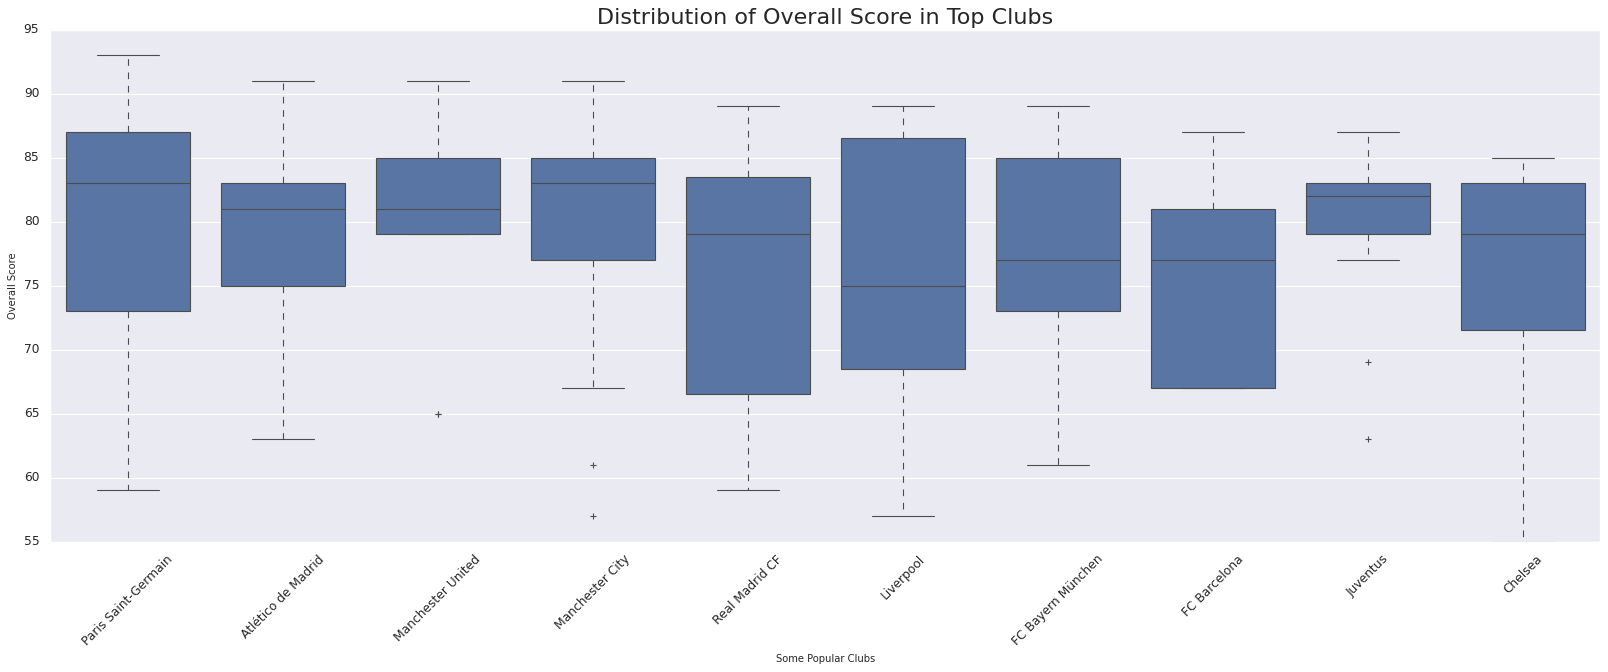

In [75]:
# Distribution of Overall Score in top Clubs

some_clubs = top_clubs["Club"].values
data_clubs = fifa_data.loc[fifa_data['Club'].isin(some_clubs) & fifa_data['Overall']]

plt.rcParams['figure.figsize'] = (25, 8)
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Overall'])
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Top Clubs', fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

##### Observations:
1. Manchester City has the highest average Overall score among the top teams


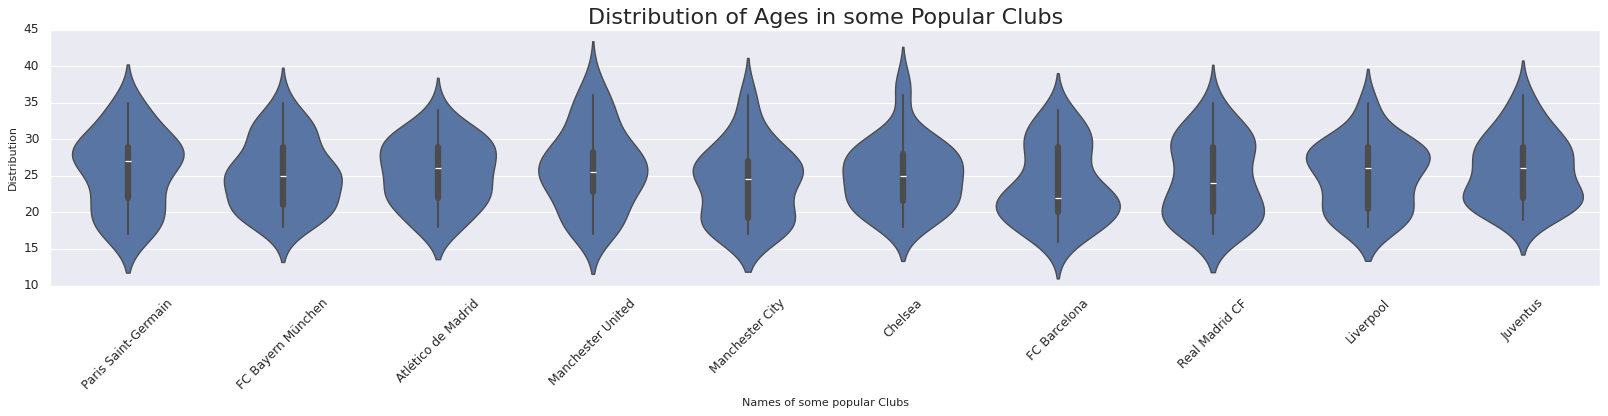

In [76]:
data_club = fifa_data.loc[fifa_data['Club'].isin(some_clubs)]

plt.rcParams['figure.figsize'] = (25, 4)
ax = sns.violinplot(x = 'Club', y = 'Age', data = data_club)
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Distribution of Ages in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

##### Observations:
1. All the top clubs seems to have majority of the players in the age group of 20-25 years

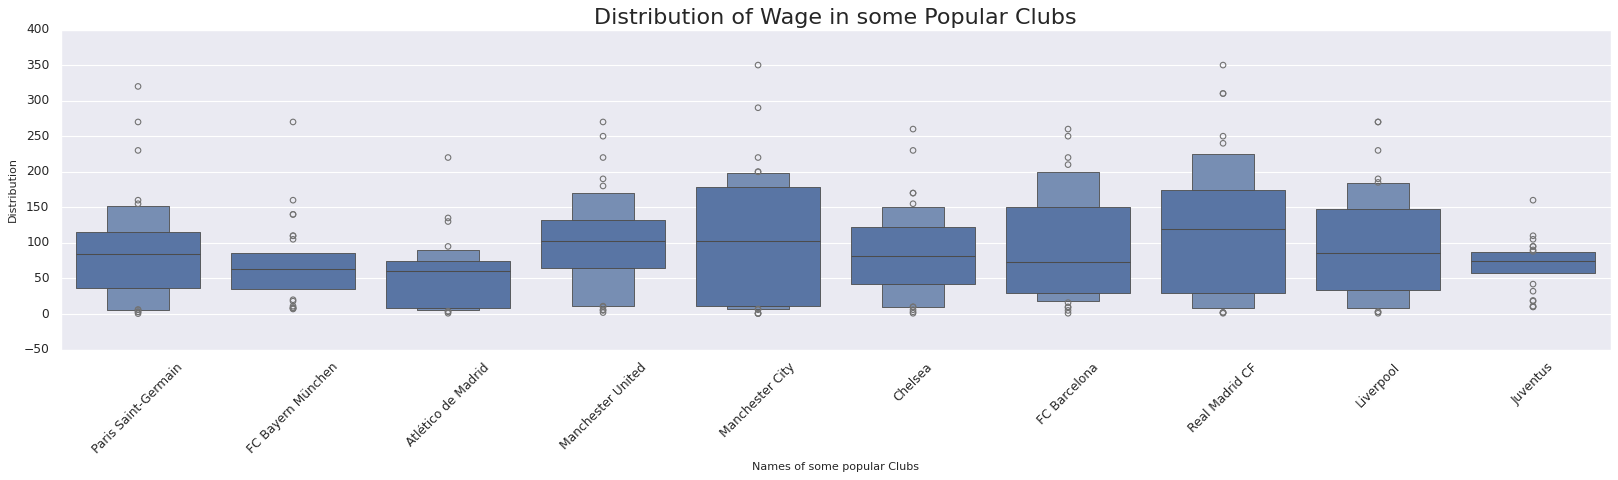

In [77]:
# Disstribution of Wage in some Popular Clubs

data_club = fifa_data.loc[fifa_data['Club'].isin(some_clubs) & fifa_data['Wage']]

plt.rcParams['figure.figsize'] = (25, 5)
ax = sns.boxenplot(x = 'Club', y = 'Wage', data = data_club)
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Distribution of Wage in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

##### Observations:
1. Manchester City seems to pay the highest avaerage Wages for the players


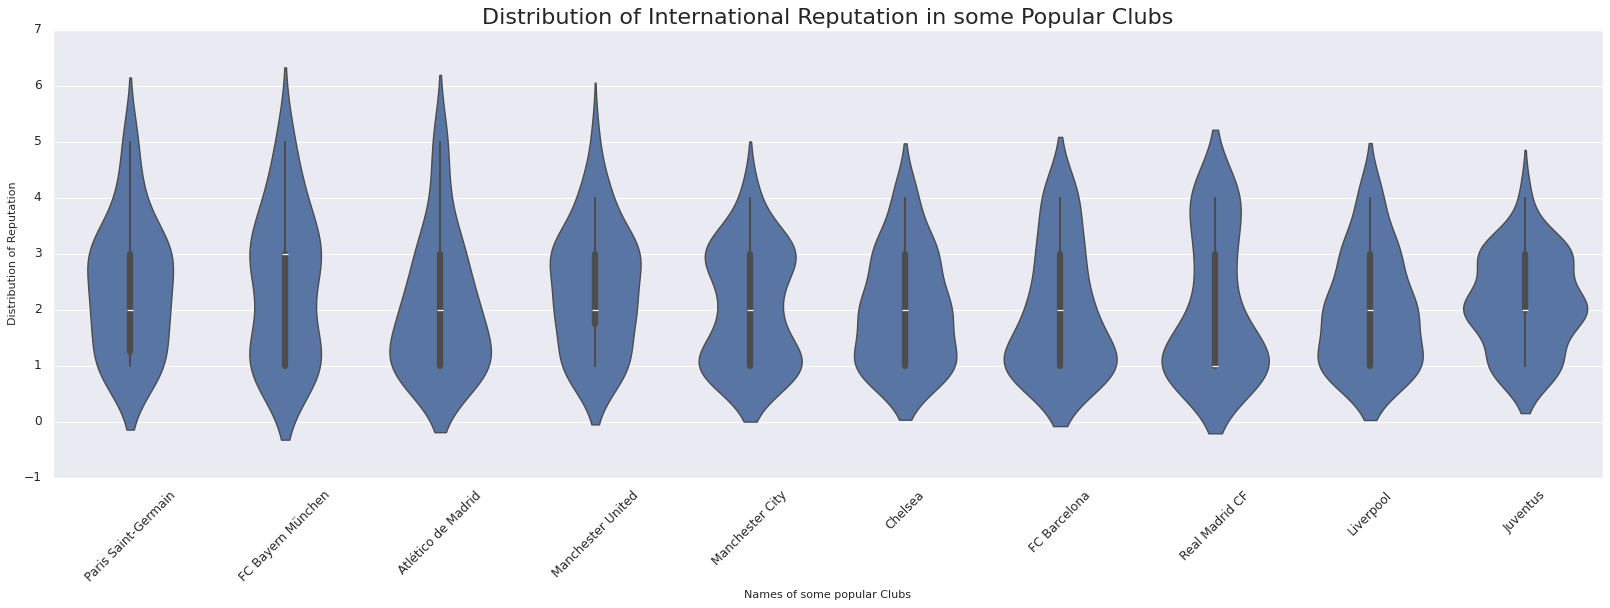

In [78]:
# Distribution of International Reputation in some Popular Clubs

data_club = fifa_data.loc[fifa_data['Club'].isin(some_clubs) & fifa_data['International Reputation']]

plt.rcParams['figure.figsize'] = (25, 7)
ax = sns.violinplot(x = 'Club', y = 'International Reputation', data = data_club)
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution of Reputation', fontsize = 10)
ax.set_title(label = 'Distribution of International Reputation in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

In [79]:
# Checking club with players from most unique countries

fifa_data.groupby(fifa_data['Club'])['Nationality'].nunique().sort_values(ascending = False).head(10)

,Nationality
Club,
Watford,21
LOSC Lille,21
Leicester City,20
Royal Charleroi S.C.,20
Arsenal,20
Torino F.C.,20
Lazio,19
AC Milan,19
SV Zulte Waregem,19


In [80]:
# Checking club with players from least unique countries

fifa_data.groupby(fifa_data['Club'])['Nationality'].nunique().sort_values(ascending = True).head(10)

,Nationality
Club,
ŁKS Łódź,1
Universidad de Chile,1
Unión Española,1
SpVgg Unterhaching,1
São Paulo,1
Academia Puerto Cabello,1
US Orléans Loiret Football,1
UD Logroñés,1
Albirex Niigata,1


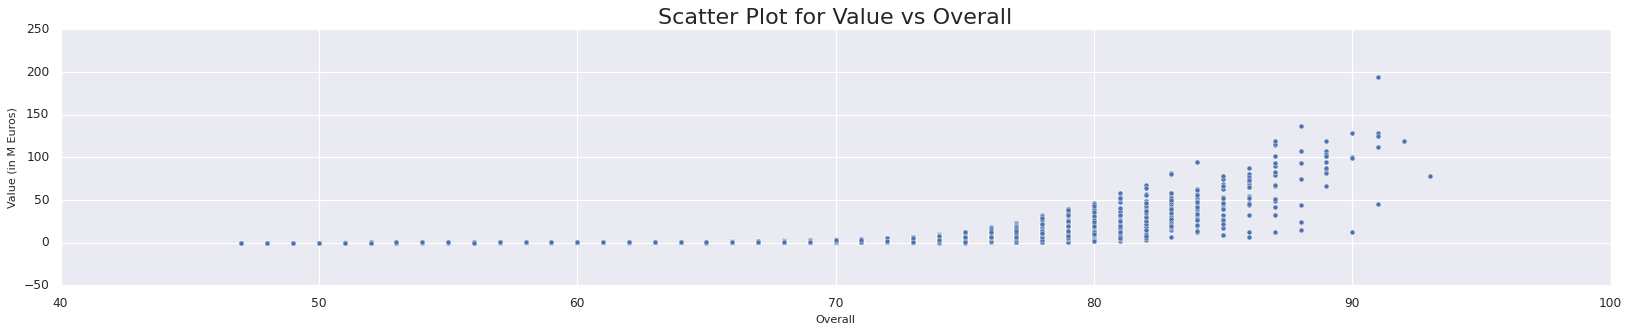

In [81]:
# Scatter plot for Age vs Overall

fix, ax = plt.subplots(1, 1, figsize=(25, 4))
ax = sns.scatterplot(x="Overall", y="Value", data=fifa_data, ax=ax)
ax.set_xlabel(xlabel = 'Overall', fontsize = 10)
ax.set_ylabel(ylabel = 'Value (in M Euros)', fontsize = 10)
ax.set_title(label = 'Scatter Plot for Value vs Overall', fontsize = 20)
plt.show()

##### Observations:
1. The Value increases with increase in Overall score

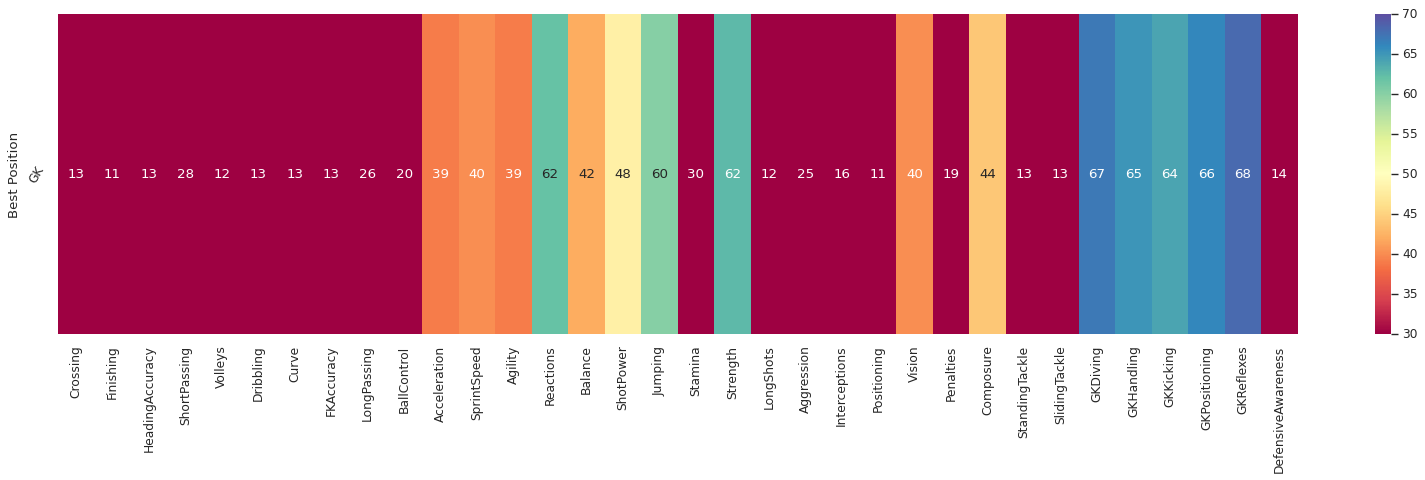

In [82]:
# Visualizing median attributes values for different "Best Positions"

fig, ax = plt.subplots(1, 1, figsize=(25, 5))
mean_attributes_by_pos_df = fifa_data[fifa_data['Position'] == "Goalkeeper"].groupby("Best Position")[
                             ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                              'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
                              'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                              'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'StandingTackle', 'SlidingTackle',
                              'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'DefensiveAwareness']
                             ].median()

g = sns.heatmap(mean_attributes_by_pos_df, cmap="Spectral", ax=ax, vmax=70, vmin=30, annot=True)
g.set_yticklabels(labels=fifa_data[fifa_data['Position'] == "Goalkeeper"]["Best Position"].unique().tolist(), rotation=60);

##### Observations:
1. "GK" have Reactions, Jumping, Strength, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes as their main attributes

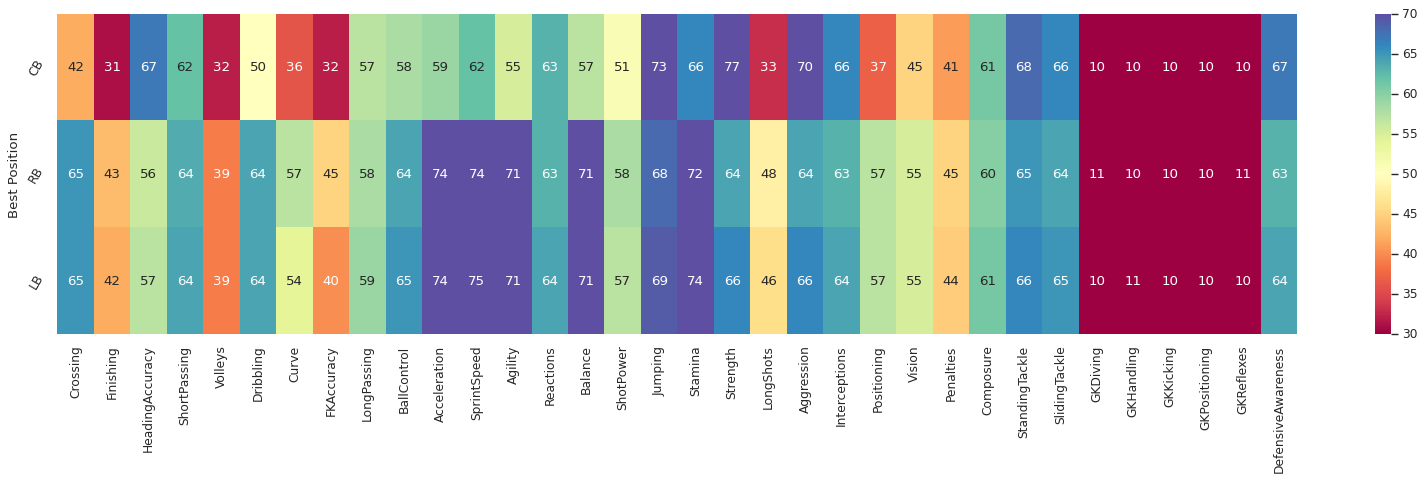

In [83]:
# Visualizing median attributes values for different "Best Positions"

fig, ax = plt.subplots(1, 1, figsize=(25, 5))
mean_attributes_by_pos_df = fifa_data[fifa_data['Position'] == "Defender"].groupby("Best Position")[
                             ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                              'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
                              'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                              'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'StandingTackle', 'SlidingTackle',
                              'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'DefensiveAwareness']
                             ].median()

g = sns.heatmap(mean_attributes_by_pos_df, cmap="Spectral", ax=ax, vmax=70, vmin=30, annot=True)
g.set_yticklabels(labels=fifa_data[fifa_data['Position'] == "Defender"]["Best Position"].unique().tolist(), rotation=60);

##### Observations:
1. "CB" have higher HeadingAccuracy, Jumping, Strength, Aggression, Interceptions, StandingTackle, SlidingTackle and DefensiveAwareness attributes
2. "LB" and "RB" have Crossing, Acceleration, SprintSpeed, Agility, Balance, Jumping, Stamina, Strength, Aggression as their major attibutes

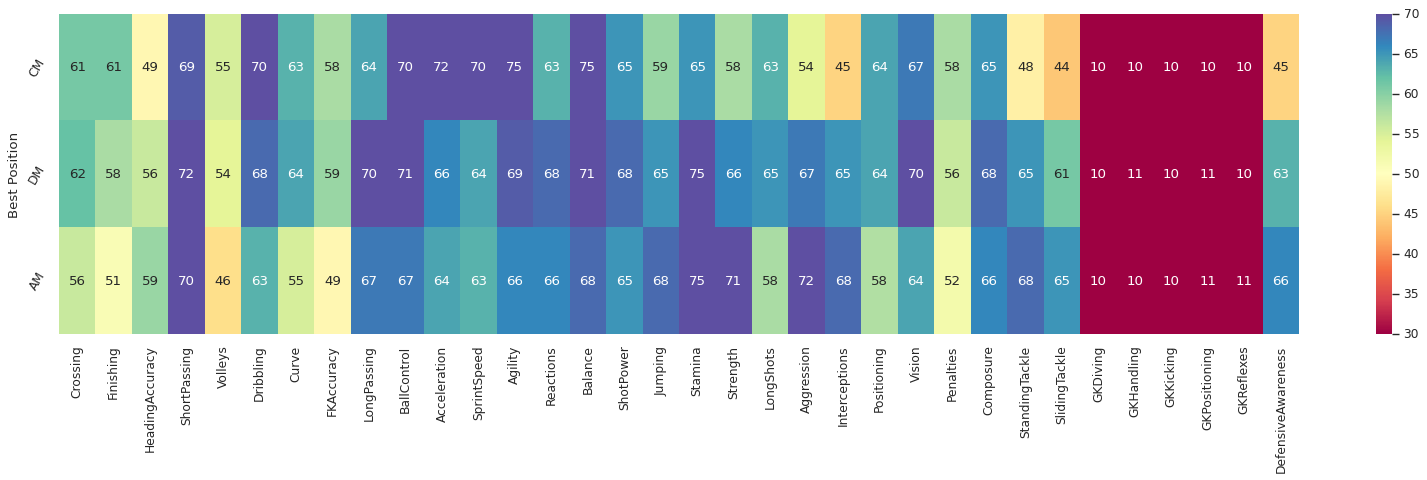

In [84]:
# Visualizing median attributes values for different "Best Positions"

fig, ax = plt.subplots(1, 1, figsize=(25, 5))
mean_attributes_by_pos_df = fifa_data[fifa_data['Position'] == "Midfielder"].groupby("Best Position")[
                             ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                              'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
                              'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                              'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'StandingTackle', 'SlidingTackle',
                              'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'DefensiveAwareness']
                             ].median()

g = sns.heatmap(mean_attributes_by_pos_df, cmap="Spectral", ax=ax, vmax=70, vmin=30, annot=True)
g.set_yticklabels(labels=fifa_data[fifa_data['Position'] == "Midfielder"]["Best Position"].unique().tolist(), rotation=60);

##### Observations:
1. "AM" have ShortPassing, Dribbling, BallControl, Acceleration, SprintSpeed, Agility, Balance as the major attributes.
2. "CM" have ShortPassing, LongPassing, BallControlm Agility, Reactions, Balance, Jumping, Stamina, Strength, Aggression, Interceptions, Composure, StandingTackle, SlidingTackle as major attributes.
3. "DM" have ShortPassing, Dribbling, LongPassing, BallControl, Acceleration, Agility, Reactions, Balance, ShotPower, Stamina, Strength, LongShots, Aggression, Vision, Composure, StandingTackle, SlidingTackle, DefensiveAwareness as major attributes

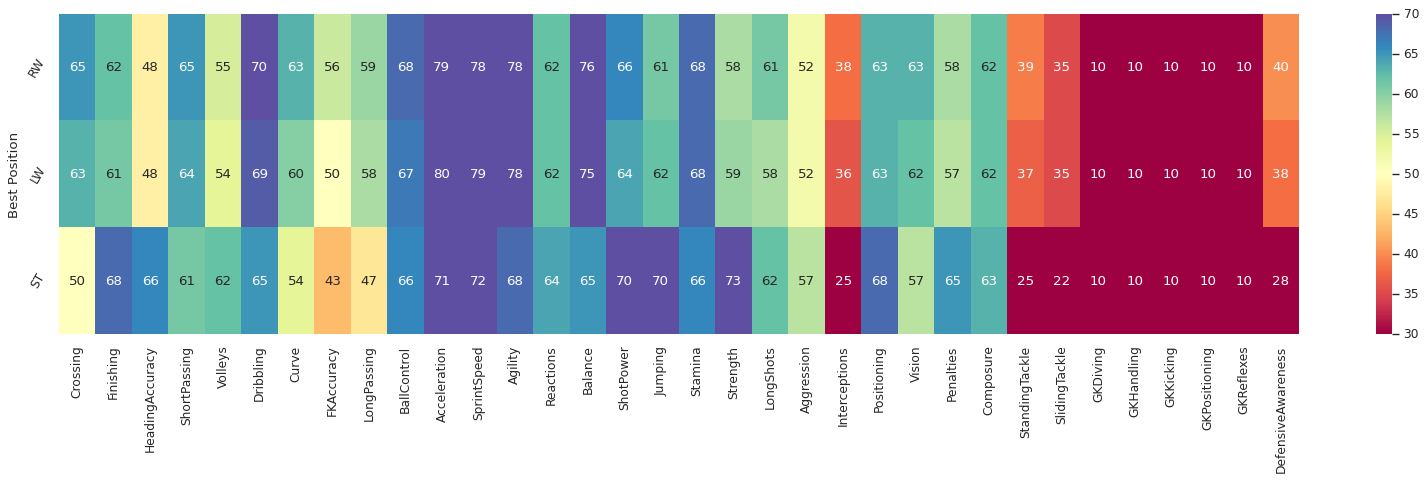

In [85]:
# Visualizing median attributes values for different "Best Positions"

fig, ax = plt.subplots(1, 1, figsize=(25, 5))
mean_attributes_by_pos_df = fifa_data[fifa_data['Position'] == "Forward"].groupby("Best Position")[
                             ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                              'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
                              'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                              'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'StandingTackle', 'SlidingTackle',
                              'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'DefensiveAwareness']
                             ].median()

g = sns.heatmap(mean_attributes_by_pos_df, cmap="Spectral", ax=ax, vmax=70, vmin=30, annot=True)
g.set_yticklabels(labels=fifa_data[fifa_data['Position'] == "Forward"]["Best Position"].unique().tolist(), rotation=60);

##### Observations:
1. "RW" and "LW" have Dribbling, BallControl, Acceleration, SprintSpeed, Agility, Balance, Stamina as their main attributes
2. "ST" have Finishing, HeadingAccuracy, Dribbling, BallControl, Acceleration, SprintSpeed, Agility, Balance, ShotPower, Jumping, Strength, Positioning, Penalties as their main attributes.

In [86]:
# Showing best player for each attribute
attributes_cols = ['Overall', 'Potential', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                   'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
                   'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                   'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'StandingTackle', 'SlidingTackle',
                   'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'DefensiveAwareness'
                  ]

feature_list = []
for col in attributes_cols:
    max_idx = fifa_data[col].idxmax()  # Get index of max value
    player_name = fifa_data.loc[max_idx, 'Name']  # Get player name at that index
    feature_list.append(["Best " + col, player_name])

niche_players = pd.DataFrame(feature_list, columns=["Feature", "Player"])
niche_players.set_index('Feature')

,Player
Feature,
Best Overall,L. Messi
Best Potential,K. Mbappé
Best Crossing,K. De Bruyne
Best Finishing,L. Messi
Best HeadingAccuracy,L. de Jong
Best ShortPassing,K. De Bruyne
Best Volleys,L. Suárez
Best Dribbling,L. Messi
Best Curve,Quaresma


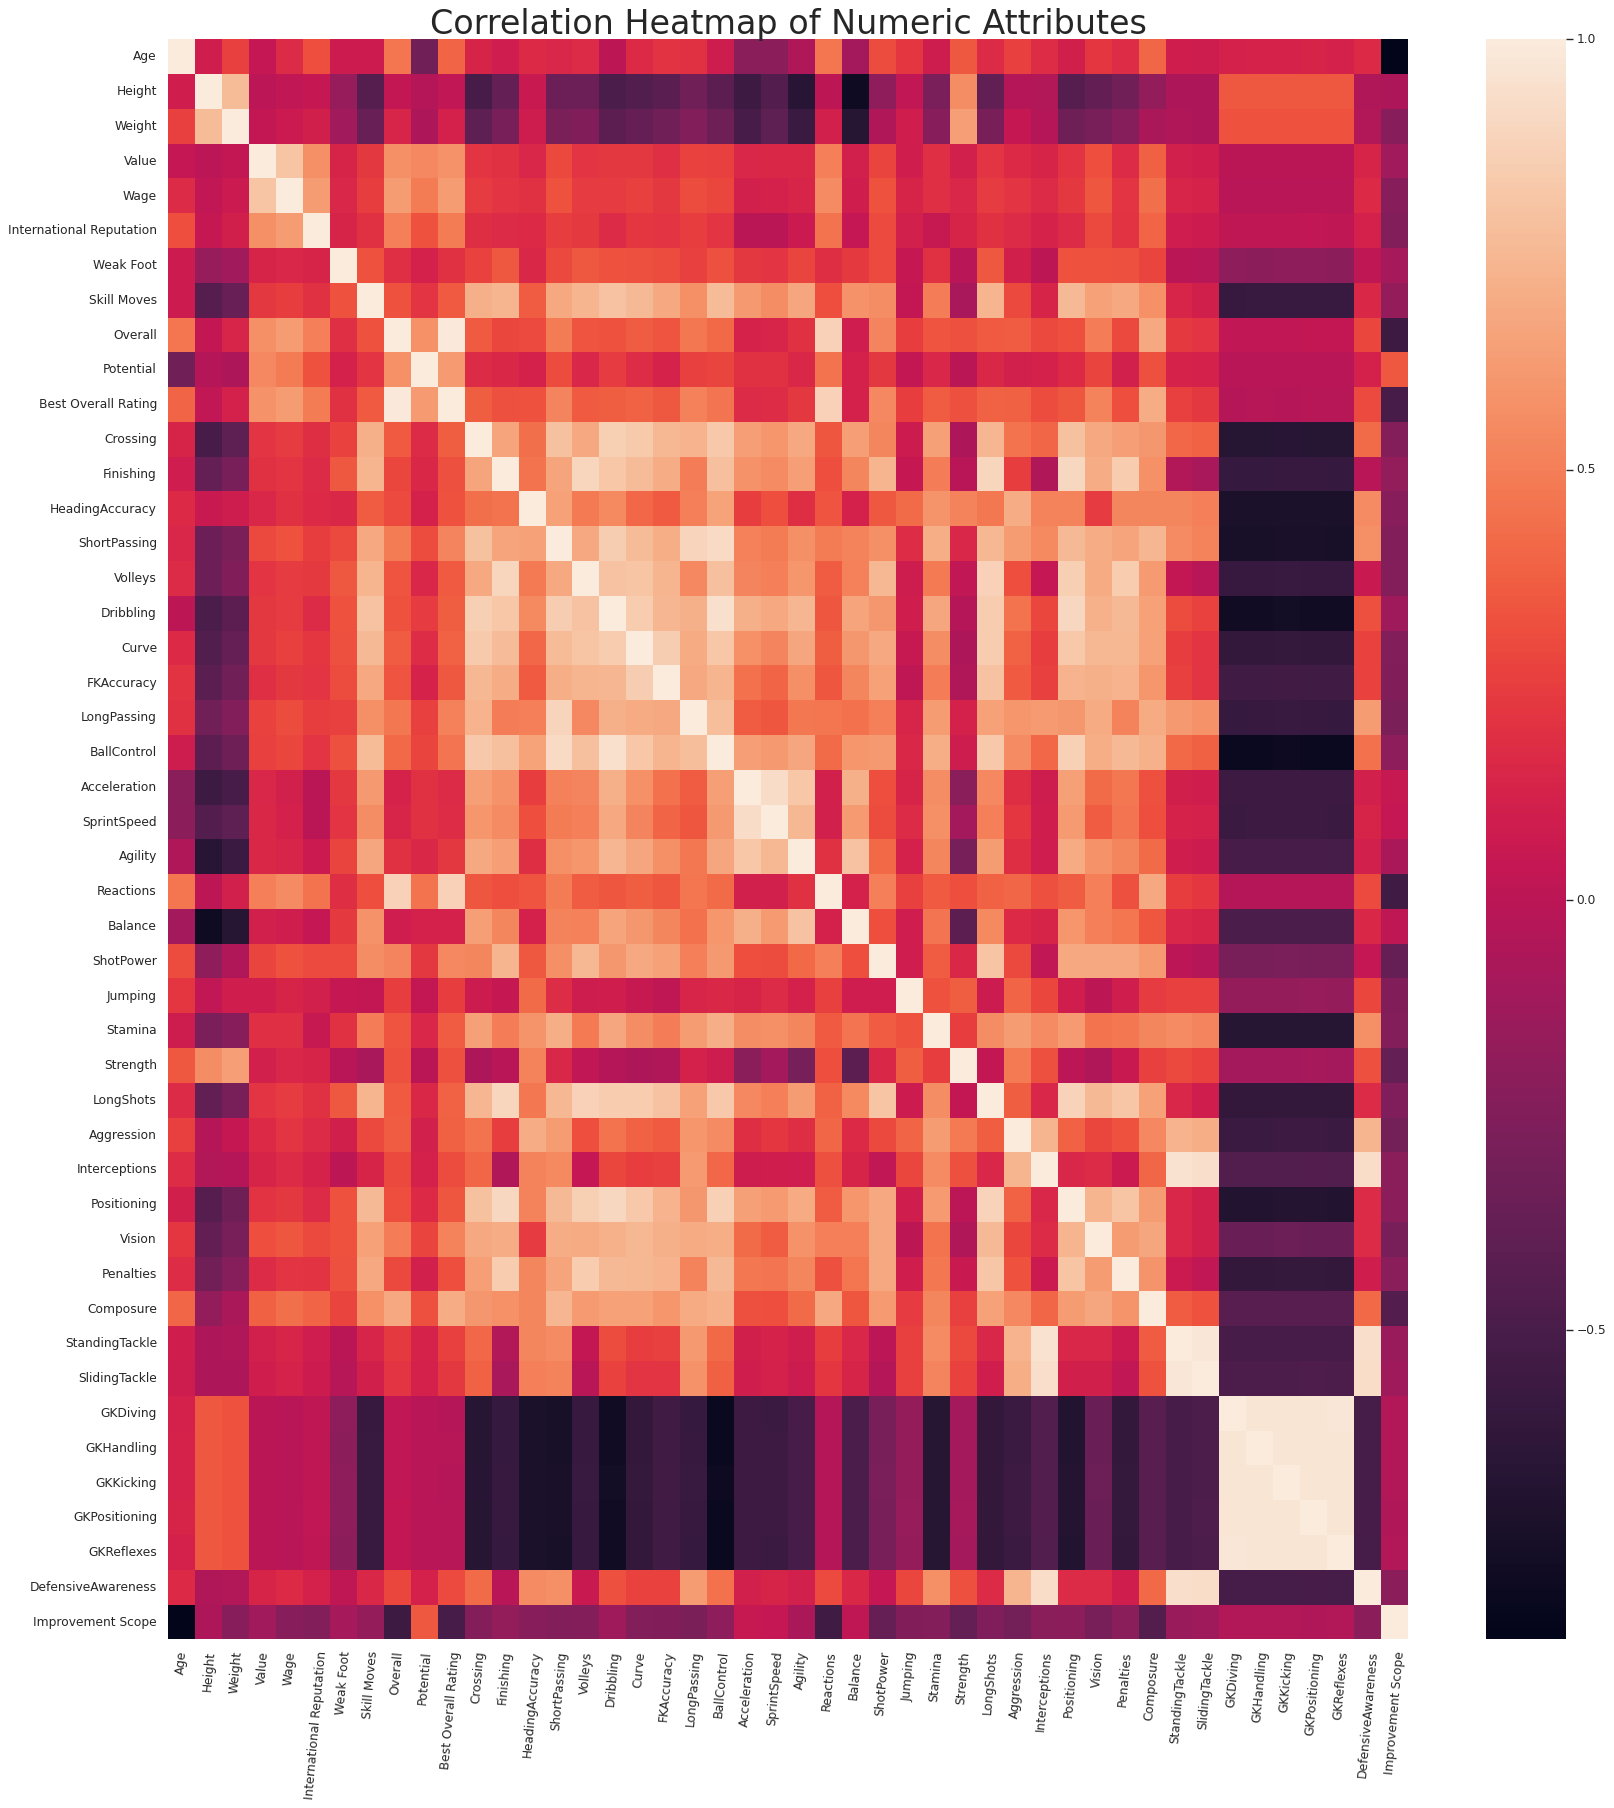

In [87]:
# plotting a correlation heatmap
plt.rcParams['figure.figsize'] = (25, 25)

numeric_cols = fifa_data.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(fifa_data[numeric_cols].corr(), annot=False)
plt.title('Correlation Heatmap of Numeric Attributes', fontsize=30)
plt.xticks(rotation=85)
plt.show()

In [88]:
def PlayerOfRespectiveNationality(x):
    return fifa_data[fifa_data['Nationality'] == x]

def PlayerOfRespectiveClub(x):
    return fifa_data[fifa_data['Club'] == x]

In [89]:
# Showing all the players from "Liverpool" which is the top valued team of FIFA 22

PlayerOfRespectiveClub("Liverpool")

,Name,Nationality,Club,Age,Height,Weight,Value,Wage,Position,Best Position,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Overall,Potential,Best Overall Rating,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,DefensiveAwareness,Improvement Scope
13,Alisson,Brazil,Liverpool,28,191.0,91.0,82.000,190.0,Goalkeeper,GK,Right,3.0,3.0,1.0,Medium/ Medium,89,90,89.0,17.0,13.0,29.0,45.0,20.0,27.0,19.0,18.0,44.0,30.0,56.0,47.0,40.0,87.0,37.0,63.0,52.0,32.0,78.0,14.0,27.0,11.0,13.0,66.0,23.0,65.0,19.0,16.0,86.0,86.0,84.0,90.0,89.0,15.0,1
17,V. van Dijk,Netherlands,Liverpool,29,193.0,92.0,86.000,230.0,Defender,CB,Right,4.0,3.0,2.0,Medium/ Medium,89,89,89.0,53.0,52.0,87.0,79.0,45.0,70.0,60.0,70.0,86.0,76.0,66.0,88.0,61.0,87.0,53.0,81.0,90.0,69.0,92.0,64.0,83.0,90.0,47.0,65.0,62.0,90.0,92.0,86.0,13.0,10.0,13.0,11.0,11.0,92.0,0
19,M. Salah,Egypt,Liverpool,29,175.0,71.0,101.000,270.0,Forward,RW,Left,4.0,3.0,4.0,High/ Medium,89,89,89.0,79.0,91.0,59.0,84.0,81.0,90.0,83.0,69.0,75.0,89.0,89.0,91.0,91.0,92.0,91.0,82.0,69.0,85.0,75.0,84.0,63.0,55.0,91.0,83.0,86.0,90.0,43.0,41.0,14.0,14.0,9.0,11.0,14.0,38.0,0
21,S. Mané,Senegal,Liverpool,29,175.0,69.0,101.000,270.0,Forward,LW,Right,4.0,4.0,4.0,High/ Medium,89,89,89.0,78.0,86.0,84.0,84.0,75.0,90.0,77.0,64.0,71.0,88.0,93.0,90.0,93.0,91.0,88.0,83.0,87.0,85.0,72.0,80.0,75.0,35.0,90.0,84.0,71.0,84.0,42.0,38.0,10.0,10.0,15.0,7.0,14.0,42.0,0
32,T. Alexander-Arnold,England,Liverpool,22,180.0,69.0,114.000,150.0,Defender,RB,Right,3.0,4.0,3.0,High/ Medium,87,92,87.0,92.0,60.0,69.0,86.0,62.0,78.0,87.0,85.0,90.0,86.0,77.0,80.0,73.0,82.0,73.0,82.0,66.0,88.0,63.0,75.0,74.0,82.0,77.0,87.0,55.0,81.0,83.0,79.0,14.0,15.0,14.0,6.0,7.0,80.0,5
35,A. Robertson,Scotland,Liverpool,27,178.0,64.0,83.000,175.0,Defender,LB,Left,3.0,2.0,3.0,High/ High,87,88,87.0,88.0,55.0,67.0,82.0,32.0,81.0,82.0,71.0,76.0,83.0,83.0,85.0,78.0,85.0,74.0,76.0,62.0,95.0,65.0,65.0,85.0,83.0,77.0,80.0,55.0,83.0,84.0,81.0,11.0,8.0,10.0,7.0,14.0,83.0,1
57,Fabinho,Brazil,Liverpool,27,188.0,78.0,73.000,165.0,Midfielder,DM,Right,3.0,2.0,3.0,Medium/ High,86,88,86.0,75.0,63.0,75.0,84.0,47.0,78.0,71.0,53.0,82.0,81.0,65.0,68.0,64.0,86.0,64.0,81.0,75.0,88.0,81.0,70.0,85.0,87.0,70.0,75.0,90.0,84.0,87.0,85.0,13.0,12.0,6.0,8.0,8.0,86.0,2
67,Thiago,Spain,Liverpool,30,174.0,70.0,65.000,180.0,Midfielder,CM,Right,3.0,3.0,5.0,Medium/ Medium,86,86,86.0,78.0,68.0,54.0,90.0,82.0,90.0,85.0,77.0,89.0,92.0,72.0,55.0,91.0,84.0,90.0,75.0,80.0,74.0,59.0,73.0,72.0,82.0,75.0,85.0,75.0,88.0,71.0,68.0,6.0,11.0,7.0,9.0,13.0,67.0,0
69,Roberto Firmino,Brazil,Liverpool,29,181.0,76.0,54.000,185.0,Forward,ST,Right,3.0,4.0,5.0,High/ High,85,85,85.0,73.0,78.0,78.0,84.0,83.0,89.0,81.0,65.0,76.0,90.0,77.0,77.0,85.0,86.0,86.0,79.0,81.0,87.0,74.0,76.0,75.0,58.0,82.0,83.0,72.0,88.0,64.0,42.0,8.0,11.0,9.0,6.0,10.0,55.0,0
122,J. Henderson,England,Liverpool,31,182.0,80.0,29.000,140.0,Midfielder,DM,Right,3.0,3.0,3.0,High/ High,84,84,84.0,82.0,73.0,65.0,85.0,71.0,78.0,80.0,74.0,87.0,83.0,67.0,66.0,69.0,85.0,68.0,77.0,78.0,86.0,78.0,75.0,83.0,81.0,78.0,80.0,64.0,82.0,81.0,76.0,7.0,13.0,7.0,9.0,13.0,79.0,0


In [90]:
# Best squad for a particular formation and club and country

def GetBestSquadBasedOnFormations(formation, data, club='', country='', age=0):

    df = data.copy()
    squad = []
    if country:
        df = df[df['Nationality'] == country]
    if club:
        df = df[df['Club'] == club]
    if age:
        df = df[df['Age'] <= age]

    for position in formation:
        ng = df[df["Best Position"] == position]
        ng = ng.sort_values(by=["Overall", "Potential", "International Reputation"], ascending=False).reset_index()
        player = ng.iloc[0]
        index_to_drop = ng.iloc[0]["index"]
        player = player[['Best Position', 'Name', 'Club', 'Nationality', 'Age', 'Overall']]
        squad.append(player)
        df = df.drop(index_to_drop)

    squad = pd.DataFrame(np.array(squad).reshape(11, 6), columns = ['Best Position', 'Name', 'Club', 'Nationality', 'Age', 'Overall'])
    return squad

In [91]:
# popular squad formations
squad_343 = ['GK','CB','CB','CB','LB','DM','CM','RB','LW','ST','RW']

squad_433 = ['GK','LB','CB','CB','RB','DM','CM','CM','LW','ST','RW']
squad_4231 = ['GK','LB','CB','CB','RB','DM','CM','LW','AM','RW','ST']
squad_442 = ['GK','LB','CB','CB','RB','LW','DM','CM','RW','ST','ST']

In [92]:
# Displaying the best squad for Liverpool

GetBestSquadBasedOnFormations(squad_433, fifa_data, country='', club='Liverpool')

,Best Position,Name,Club,Nationality,Age,Overall
0,GK,Alisson,Liverpool,Brazil,28,89
1,LB,A. Robertson,Liverpool,Scotland,27,87
2,CB,V. van Dijk,Liverpool,Netherlands,29,89
3,CB,J. Matip,Liverpool,Cameroon,29,83
4,RB,T. Alexander-Arnold,Liverpool,England,22,87
5,DM,Fabinho,Liverpool,Brazil,27,86
6,CM,Thiago,Liverpool,Spain,30,86
7,CM,Diogo Jota,Liverpool,Portugal,24,82
8,LW,S. Mané,Liverpool,Senegal,29,89
9,ST,Roberto Firmino,Liverpool,Brazil,29,85


In [93]:
# Displaying the best squad for Manchester City

GetBestSquadBasedOnFormations(squad_4231, fifa_data, country='', club='Manchester City')

,Best Position,Name,Club,Nationality,Age,Overall
0,GK,Ederson,Manchester City,Brazil,27,89
1,LB,O. Zinchenko,Manchester City,Ukraine,24,80
2,CB,Rúben Dias,Manchester City,Portugal,24,87
3,CB,A. Laporte,Manchester City,Spain,27,86
4,RB,João Cancelo,Manchester City,Portugal,27,86
5,DM,Rodri,Manchester City,Spain,25,86
6,CM,K. De Bruyne,Manchester City,Belgium,30,91
7,LW,R. Sterling,Manchester City,England,26,88
8,AM,Bernardo Silva,Manchester City,Portugal,26,86
9,RW,R. Mahrez,Manchester City,Algeria,30,86


In [94]:
# Displaying the best squad for Germany

GetBestSquadBasedOnFormations(squad_4231, fifa_data, country='Germany')

,Best Position,Name,Club,Nationality,Age,Overall
0,GK,M. ter Stegen,FC Barcelona,Germany,29,90
1,LB,R. Gosens,Atalanta,Germany,26,83
2,CB,M. Hummels,Borussia Dortmund,Germany,32,86
3,CB,M. Ginter,Borussia Mönchengladbach,Germany,27,84
4,RB,L. Klostermann,RB Leipzig,Germany,25,80
5,DM,J. Kimmich,FC Bayern München,Germany,26,89
6,CM,T. Kroos,Real Madrid CF,Germany,31,88
7,LW,P. Max,PSV,Germany,27,80
8,AM,T. Müller,FC Bayern München,Germany,31,87
9,RW,S. Gnabry,FC Bayern München,Germany,25,85


In [95]:
# Displaying the best squad

GetBestSquadBasedOnFormations(squad_4231, fifa_data)

,Best Position,Name,Club,Nationality,Age,Overall
0,GK,J. Oblak,Atlético de Madrid,Slovenia,28,91
1,LB,A. Robertson,Liverpool,Scotland,27,87
2,CB,V. van Dijk,Liverpool,Netherlands,29,89
3,CB,Sergio Ramos,Paris Saint-Germain,Spain,35,88
4,RB,T. Alexander-Arnold,Liverpool,England,22,87
5,DM,N. Kanté,Chelsea,France,30,90
6,CM,K. De Bruyne,Manchester City,Belgium,30,91
7,LW,R. Lewandowski,FC Bayern München,Poland,32,92
8,AM,Bruno Fernandes,Manchester United,Portugal,26,88
9,RW,L. Messi,Paris Saint-Germain,Argentina,34,93


In [96]:
# Displaying the best squad u21

GetBestSquadBasedOnFormations(squad_4231, fifa_data, age=21)

,Best Position,Name,Club,Nationality,Age,Overall
0,GK,I. Meslier,Leeds United,France,21,77
1,LB,A. Davies,FC Bayern München,Canada,20,82
2,CB,M. de Ligt,Juventus,Netherlands,21,85
3,CB,M. Lacroix,VfL Wolfsburg,France,21,79
4,RB,R. James,Chelsea,England,21,81
5,DM,Rosberto Dourado,Sport Club Corinthians Paulista,Brazil,21,81
6,CM,J. Bellingham,Borussia Dortmund,England,18,79
7,LW,D. Kulusevski,Juventus,Sweden,21,81
8,AM,J. Sancho,Manchester United,England,21,87
9,RW,Vinícius Jr.,Real Madrid CF,Brazil,20,80


In [97]:
fifa_data.head(12)

,Name,Nationality,Club,Age,Height,Weight,Value,Wage,Position,Best Position,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Overall,Potential,Best Overall Rating,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,DefensiveAwareness,Improvement Scope
0,L. Messi,Argentina,Paris Saint-Germain,34,170.0,72.0,78.0,320.0,Forward,RW,Left,5.0,4.0,4.0,Medium/ Low,93,93,93.0,85.0,95.0,70.0,91.0,88.0,96.0,93.0,94.0,91.0,96.0,91.0,80.0,91.0,94.0,95.0,86.0,68.0,72.0,69.0,94.0,44.0,40.0,93.0,95.0,75.0,96.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0,20.0,0
1,R. Lewandowski,Poland,FC Bayern München,32,185.0,81.0,119.0,270.0,Forward,LW,Right,5.0,4.0,4.0,High/ Medium,92,92,92.0,71.0,95.0,90.0,85.0,89.0,85.0,79.0,85.0,70.0,88.0,77.0,79.0,77.0,93.0,82.0,90.0,85.0,76.0,86.0,87.0,81.0,49.0,95.0,81.0,90.0,88.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,35.0,0
2,Neymar Jr,Brazil,Paris Saint-Germain,29,175.0,68.0,129.0,270.0,Forward,LW,Right,5.0,5.0,5.0,High/ Medium,91,91,91.0,85.0,83.0,63.0,86.0,86.0,95.0,88.0,87.0,81.0,95.0,93.0,89.0,96.0,89.0,84.0,80.0,64.0,81.0,53.0,81.0,63.0,37.0,86.0,90.0,93.0,93.0,32.0,29.0,9.0,9.0,15.0,15.0,11.0,35.0,0
3,K. Mbappé,France,Paris Saint-Germain,22,182.0,73.0,194.0,230.0,Forward,ST,Right,4.0,4.0,5.0,High/ Low,91,95,92.0,78.0,93.0,72.0,85.0,83.0,93.0,80.0,69.0,71.0,91.0,97.0,97.0,92.0,93.0,83.0,86.0,78.0,88.0,77.0,82.0,62.0,38.0,92.0,82.0,79.0,88.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0,26.0,4
4,J. Oblak,Slovenia,Atlético de Madrid,28,188.0,87.0,112.0,130.0,Goalkeeper,GK,Right,5.0,3.0,1.0,Medium/ Medium,91,93,91.0,13.0,11.0,15.0,43.0,13.0,12.0,13.0,14.0,40.0,30.0,43.0,60.0,67.0,88.0,49.0,59.0,78.0,41.0,78.0,12.0,34.0,19.0,11.0,65.0,11.0,68.0,12.0,18.0,87.0,92.0,78.0,90.0,90.0,27.0,2
5,Cristiano Ronaldo,Portugal,Manchester United,36,187.0,83.0,45.0,270.0,Forward,ST,Right,5.0,4.0,5.0,High/ Low,91,91,91.0,87.0,95.0,90.0,80.0,86.0,88.0,81.0,84.0,77.0,88.0,85.0,88.0,86.0,94.0,74.0,94.0,95.0,77.0,77.0,93.0,63.0,29.0,95.0,76.0,88.0,95.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0,24.0,0
6,K. De Bruyne,Belgium,Manchester City,30,181.0,70.0,125.0,350.0,Midfielder,CM,Right,4.0,5.0,4.0,High/ High,91,91,91.0,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,76.0,76.0,79.0,91.0,78.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,83.0,89.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,68.0,0
7,M. Neuer,Germany,FC Bayern München,35,193.0,93.0,13.0,86.0,Goalkeeper,GK,Right,5.0,4.0,1.0,Medium/ Medium,90,90,90.0,15.0,13.0,25.0,60.0,11.0,30.0,14.0,11.0,68.0,46.0,54.0,60.0,51.0,87.0,35.0,68.0,77.0,43.0,80.0,16.0,29.0,30.0,12.0,70.0,47.0,70.0,10.0,11.0,88.0,88.0,91.0,89.0,88.0,17.0,0
8,N. Kanté,France,Chelsea,30,168.0,70.0,100.0,230.0,Midfielder,DM,Right,4.0,3.0,2.0,Medium/ High,90,90,90.0,68.0,65.0,54.0,82.0,56.0,79.0,49.0,49.0,79.0,81.0,82.0,75.0,82.0,93.0,92.0,71.0,77.0,97.0,72.0,65.0,93.0,91.0,72.0,78.0,54.0,84.0,93.0,86.0,15.0,12.0,10.0,7.0,10.0,90.0,0
9,H. Kane,England,Tottenham Hotspur,27,188.0,89.0,129.0,240.0,Forward,ST,Right,4.0,5.0,3.0,High/ High,90,90,90.0,80.0,94.0,86.0,85.0,88.0,83.0,83.0,65.0,86.0,85.0,65.0,74.0,71.0,92.0,70.0,91.0,79.0,83.0,85.0,86.0,80.0,44.0,94.0,87.0,91.0,91.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,50.0,0


### **3.3 Feature Engineering**


#### **3.3.1 Feature Scaling**


In [98]:
sc = MinMaxScaler()

In [99]:
# Scaling the attribute features

features_to_scale = [ 'Overall', 'Crossing', 'Finishing',
                      'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                      'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                      'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                      'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                      'GKKicking', 'GKPositioning', 'GKReflexes', 'DefensiveAwareness'
                    ]

attributes_scaled = sc.fit_transform(fifa_data[features_to_scale].values)

#### **3.3.2 Feature Encoding**

In [100]:
# Label Encoded the Work Rate and Prefered Foot

work_rate_dict = {'Medium/ Medium': 4, 'High/ Low': 4, 'High/ Medium': 6, 'High/ High': 9,
                  'Medium/ High': 6, 'Medium/ Low': 2, 'Low/ High': 4, 'Low/ Medium': 2, 'Low/ Low': 1
                 }

fifa_data['Work Rate'] = fifa_data['Work Rate'].map(work_rate_dict)

In [101]:
fifa_data["Preferred Foot"] = fifa_data["Preferred Foot"].map({"Left": 0, "Right":1})

In [102]:
# OHE for the best position

le1 = LabelEncoder()
best_position = le1.fit_transform(fifa_data["Best Position"])

ohe1 = OneHotEncoder()
best_position_ohe = ohe1.fit_transform(best_position.reshape(-1,1))
best_position_ohe = pd.DataFrame(best_position_ohe.toarray(), columns = ["Best_Position_" + col for col in le1.classes_])

#### **3.3.3 Feature Selection**

In [103]:
# Prepared the dataframe for Clustering algorithms

X = pd.concat([best_position_ohe, fifa_data[["Preferred Foot", "International Reputation", "Weak Foot", "Skill Moves", "Work Rate"]], pd.DataFrame(attributes_scaled, columns=features_to_scale)], axis=1)

## **4. Model Building**

Since the data has been prepare we can start the model building and try to obtain the best suited algorithm.

In [104]:
# Building and fitting the model with MiniBatchKMeans

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(10,201)

for k in K:
    kmeanModel = MiniBatchKMeans(n_clusters = k, batch_size=2000)
    kmeanModel.fit(X.values)

    distortions.append(sum(np.min(cdist(X.values, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

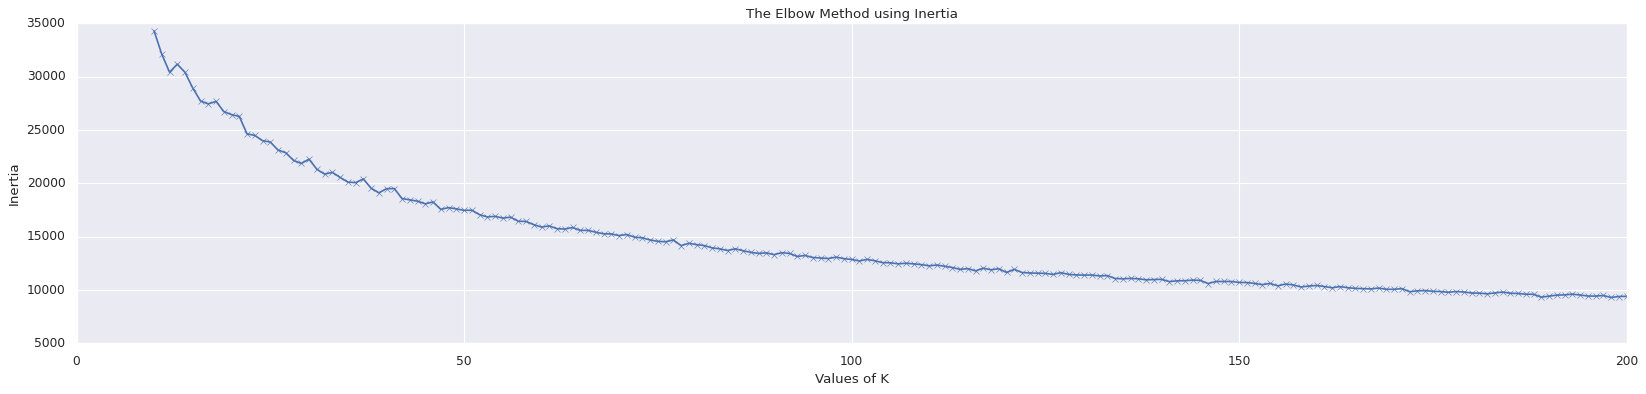

In [105]:
plt.rcParams['figure.figsize'] = (25, 5)
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

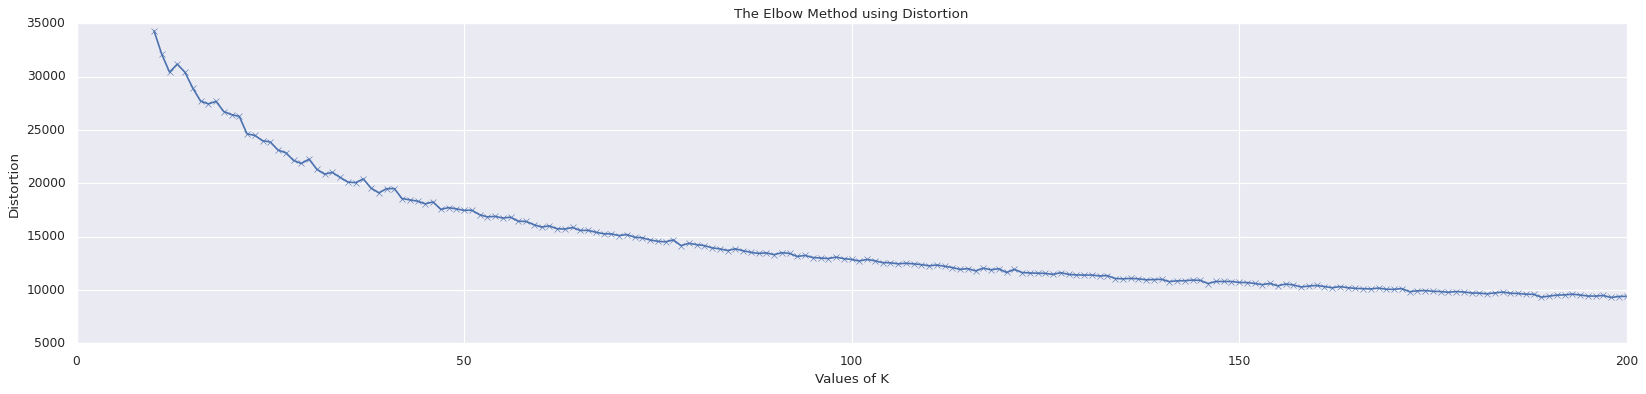

In [106]:
plt.rcParams['figure.figsize'] = (25, 5)
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [107]:
# Taking k=50

kmeanModel = MiniBatchKMeans(n_clusters = 50, batch_size=4000)
kmeanModel.fit(X.values)
predicted_cluster = kmeanModel.predict(X.values)
kmeanModel.labels_

array([41, 27, 27, ..., 24,  5, 48], dtype=int32)

In [108]:
silhouette_avg = metrics.silhouette_score(X.values, predicted_cluster)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.22761650735385264


In [109]:
fifa_data["KMeans Label"] = predicted_cluster

In [110]:
bandwidth = estimate_bandwidth(X.values, quantile=0.4, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X.values)
predicted_cluster2 = ms.predict(X.values)

In [111]:
fifa_data["MeanShift Label"] = predicted_cluster2

In [112]:
db = DBSCAN()
predicted_cluster3 = db.fit_predict(X.values)

In [113]:
fifa_data["DBSCAN Label"] = predicted_cluster3

In [114]:
op = OPTICS()
predicted_cluster4 = op.fit_predict(X.values)
fifa_data["OPTICS Label"] = predicted_cluster4

In [115]:
ac = AgglomerativeClustering(n_clusters = 75)
predicted_cluster5 = ac.fit_predict(X.values)
fifa_data["AGG Label"] = predicted_cluster5

In [116]:
afc = AffinityPropagation()
predicted_cluster6 = afc.fit_predict(X.values)
fifa_data["AFF Label"] = predicted_cluster6

In [117]:
spec_cluster = SpectralClustering(n_clusters = 50)
predicted_cluster6 = spec_cluster.fit_predict(X.values)
fifa_data["SC Label"] = predicted_cluster6

In [118]:
def DisplayTopTenSimilarPlayers(name, label="KMeans Label"):
    names = fifa_data["Name"]
    matches = process.extract(name, names, scorer=fuzz.partial_ratio)
    if len(matches) == 0:
        return "No Match Found"
    cluster = fifa_data.iloc[matches[0][2]][label]
    return fifa_data[(fifa_data[label] == cluster) & (fifa_data.index != matches[0][2])].head(10)[['Name', 'Nationality', 'Club', 'Age', 'Best Position', 'Overall']]

In [119]:
DisplayTopTenSimilarPlayers("Cavani", "AGG Label")

,Name,Nationality,Club,Age,Best Position,Overall
6,K. De Bruyne,Belgium,Manchester City,30,CM,91
9,H. Kane,England,Tottenham Hotspur,27,ST,90
18,Casemiro,Brazil,Real Madrid CF,29,DM,89
20,H. Son,Korea Republic,Tottenham Hotspur,28,LW,89
25,E. Haaland,Norway,Borussia Dortmund,20,ST,88
35,A. Robertson,Scotland,Liverpool,27,LB,87
41,T. Müller,Germany,FC Bayern München,31,AM,87
51,M. Hummels,Germany,Borussia Dortmund,32,CB,86
103,H. Ziyech,Morocco,Chelsea,28,RW,84
105,F. Kessié,Côte d'Ivoire,AC Milan,24,DM,84


In [120]:
fifa_data.head()

,Name,Nationality,Club,Age,Height,Weight,Value,Wage,Position,Best Position,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Overall,Potential,Best Overall Rating,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,DefensiveAwareness,Improvement Scope,KMeans Label,MeanShift Label,DBSCAN Label,OPTICS Label,AGG Label,AFF Label,SC Label
0,L. Messi,Argentina,Paris Saint-Germain,34,170.0,72.0,78.0,320.0,Forward,RW,0,5.0,4.0,4.0,2,93,93,93.0,85.0,95.0,70.0,91.0,88.0,96.0,93.0,94.0,91.0,96.0,91.0,80.0,91.0,94.0,95.0,86.0,68.0,72.0,69.0,94.0,44.0,40.0,93.0,95.0,75.0,96.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0,20.0,0,41,0,-1,-1,42,4,3
1,R. Lewandowski,Poland,FC Bayern München,32,185.0,81.0,119.0,270.0,Forward,LW,1,5.0,4.0,4.0,6,92,92,92.0,71.0,95.0,90.0,85.0,89.0,85.0,79.0,85.0,70.0,88.0,77.0,79.0,77.0,93.0,82.0,90.0,85.0,76.0,86.0,87.0,81.0,49.0,95.0,81.0,90.0,88.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,35.0,0,27,0,-1,-1,53,0,17
2,Neymar Jr,Brazil,Paris Saint-Germain,29,175.0,68.0,129.0,270.0,Forward,LW,1,5.0,5.0,5.0,6,91,91,91.0,85.0,83.0,63.0,86.0,86.0,95.0,88.0,87.0,81.0,95.0,93.0,89.0,96.0,89.0,84.0,80.0,64.0,81.0,53.0,81.0,63.0,37.0,86.0,90.0,93.0,93.0,32.0,29.0,9.0,9.0,15.0,15.0,11.0,35.0,0,27,0,-1,-1,53,0,1
3,K. Mbappé,France,Paris Saint-Germain,22,182.0,73.0,194.0,230.0,Forward,ST,1,4.0,4.0,5.0,4,91,95,92.0,78.0,93.0,72.0,85.0,83.0,93.0,80.0,69.0,71.0,91.0,97.0,97.0,92.0,93.0,83.0,86.0,78.0,88.0,77.0,82.0,62.0,38.0,92.0,82.0,79.0,88.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0,26.0,4,21,0,-1,-1,42,20,13
4,J. Oblak,Slovenia,Atlético de Madrid,28,188.0,87.0,112.0,130.0,Goalkeeper,GK,1,5.0,3.0,1.0,4,91,93,91.0,13.0,11.0,15.0,43.0,13.0,12.0,13.0,14.0,40.0,30.0,43.0,60.0,67.0,88.0,49.0,59.0,78.0,41.0,78.0,12.0,34.0,19.0,11.0,65.0,11.0,68.0,12.0,18.0,87.0,92.0,78.0,90.0,90.0,27.0,2,45,0,-1,-1,14,3,8


### **5. Conclusion**  

Through this FIFA 22 player analysis, I explored the relationships between player attributes, positions and performance metrics. The data revealed key insights like,
- Peak performance ages (20-30),

- The dominance of nations like Spain and Germany in player quality and

- Clubs like Paris Saint-Germain and Manchester City boasting the highest-rated squads.

Unsupervised learning techniques, including K-Means and hierarchical clustering, helped identify player groupings based on skills and potential, which can be valuable for scouting or team strategy. While the analysis uncovered patterns in wages, values and positional strengths, there’s always room to dive deeper perhaps by incorporating more advanced metrics or real-world performance data.

Overall, this project was a fantastic way to blend my passion for football with data science, offering insights for gamers and analysts alike.